In [1]:
import os
import h5py
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import lineid_plot
from ramandecompy import spectrafit
from ramandecompy import peakidentify
from ramandecompy import dataprep
from ramandecompy import datavis
from ramandecompy import dataimport
from ramandecompy import interpolatespectra
from scipy import interpolate

# Make sure to look at peakidentify and chemical reactions to remove unnecessary additions to your calibration spectra before continuing 

In [2]:
dataprep.new_hdf5('supervised_calibration_dataset')
dataprep.add_calibration('supervised_calibration_dataset.hdf5', '../ramandecompy/tests/test_files/water.xlsx', 'water')
dataprep.add_calibration('supervised_calibration_dataset.hdf5', '../ramandecompy/tests/test_files/Hydrogen_Baseline_Calibration.xlsx', 'hydrogen')
# dataprep.add_calibration('supervised_calibration_dataset.hdf5', '../ramandecompy/tests/test_files/Methane_Baseline_Calibration.xlsx', 'methane')
dataprep.add_calibration('supervised_calibration_dataset.hdf5', '../ramandecompy/tests/test_files/CarbonMonoxide_Baseline_Calibration.xlsx', 'carbon monoxide')
dataprep.add_calibration('supervised_calibration_dataset.hdf5', '../ramandecompy/tests/test_files/CO2_100wt%.csv', 'carbon dioxide')
dataprep.add_calibration('supervised_calibration_dataset.hdf5', '../ramandecompy/tests/test_files/sapphire.xlsx', 'sapphire')
# dataprep.add_calibration('supervised_calibration_dataset.hdf5', '../ramandecompy/tests/test_files/Propane_test.xlsx', 'propane')
# dataprep.add_calibration('supervised_calibration_dataset.hdf5', '../ramandecompy/tests/test_files/Ethane_test.xlsx', 'ethane')
dataprep.add_calibration('supervised_calibration_dataset.hdf5','../ramandecompy/tests/test_files/FormicAcid_3_6percent.xlsx',label='FormicAcid')
# dataprep.add_calibration('supervised_calibration_dataset.hdf5', '../ramandecompy/tests/test_files/Acetaldehyde_test.xlsx', 'acetaldehyde')

Data from ../ramandecompy/tests/test_files/water.xlsx fit with compound pseudo-Voigt model. Results saved to supervised_calibration_dataset.hdf5.
Data from ../ramandecompy/tests/test_files/Hydrogen_Baseline_Calibration.xlsx fit with compound pseudo-Voigt model. Results saved to supervised_calibration_dataset.hdf5.
Data from ../ramandecompy/tests/test_files/CarbonMonoxide_Baseline_Calibration.xlsx fit with compound pseudo-Voigt model. Results saved to supervised_calibration_dataset.hdf5.
Data from ../ramandecompy/tests/test_files/CO2_100wt%.csv fit with compound pseudo-Voigt model. Results saved to supervised_calibration_dataset.hdf5.
Data from ../ramandecompy/tests/test_files/sapphire.xlsx fit with compound pseudo-Voigt model. Results saved to supervised_calibration_dataset.hdf5.
Data from ../ramandecompy/tests/test_files/FormicAcid_3_6percent.xlsx fit with compound pseudo-Voigt model. Results saved to supervised_calibration_dataset.hdf5.


In [3]:
dataprep.view_hdf5('supervised_calibration_dataset.hdf5')

**** supervised_calibration_dataset.hdf5 ****
FormicAcid
|    Peak_01
|    Peak_02
|    Peak_03
|    Peak_04
|    Peak_05
|    Peak_06
|    counts
|    residuals
|    wavenumber
carbon dioxide
|    Peak_01
|    Peak_02
|    counts
|    residuals
|    wavenumber
carbon monoxide
|    Peak_01
|    counts
|    residuals
|    wavenumber
hydrogen
|    Peak_01
|    Peak_02
|    Peak_03
|    Peak_04
|    counts
|    residuals
|    wavenumber
sapphire
|    Peak_01
|    Peak_02
|    Peak_03
|    Peak_04
|    counts
|    residuals
|    wavenumber
water
|    Peak_01
|    Peak_02
|    counts
|    residuals
|    wavenumber


# Interpolated calibration dataset

In [4]:
# dataprep.new_hdf5('supervised_calibration_interp')

In [5]:
dataprep.view_hdf5('../ramandecompy/tests/test_files/supervised_calibration_interp-Copy2.hdf5')

**** ../ramandecompy/tests/test_files/supervised_calibration_interp-Copy2.hdf5 ****
interp_FormicAcid
|    0
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    counts
|    |    residuals
|    |    wavenumber
|    1
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    counts
|    |    residuals
|    |    wavenumber
|    10
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|   

|    |    Peak_19
|    |    Peak_20
|    |    Peak_21
|    |    Peak_22
|    |    Peak_23
|    |    Peak_24
|    |    counts
|    |    residuals
|    |    wavenumber
|    3
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    Peak_21
|    |    counts
|    |    residuals
|    |    wavenumber
|    30
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    counts
|    |

|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    counts
|    |    residuals
|    |    wavenumber
|    54
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    counts
|    |    residuals
|    |    wavenumber
|    55
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|   

|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    counts
|    |    residuals
|    |    wavenumber
|    21
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    Peak_21
|    |    Peak_22
|    |    counts
|    |    residuals
|    |    wavenumber
|    22
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|   

|    |    Peak_19
|    |    Peak_20
|    |    counts
|    |    residuals
|    |    wavenumber
|    43
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    Peak_21
|    |    Peak_22
|    |    counts
|    |    residuals
|    |    wavenumber
|    44
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    counts
|    |    residuals
|    |    wavenumber
|    45
|    |    Peak_01
|    |    

|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    counts
|    |    residuals
|    |    wavenumber
|    11
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    counts
|    |    residuals
|    |    wavenumber
|    12
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    counts
|    |    residuals
|    |    wavenumber
|    13
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    

|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    counts
|    |    residuals
|    |    wavenumber
|    43
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    Peak_21
|    |    Peak_22
|    |    counts
|    |    residuals
|    |    wavenumber
|    44
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|   

|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    counts
|    |    residuals
|    |    wavenumber
|    16
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    counts
|    |    residuals
|    |    wavenumber
|    17
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|   

|    |    residuals
|    |    wavenumber
|    39
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    Peak_21
|    |    Peak_22
|    |    counts
|    |    residuals
|    |    wavenumber
|    4
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    counts
|    |    residuals
|    |    wavenumber
|    40
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    

|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    Peak_21
|    |    counts
|    |    residuals
|    |    wavenumber
|    7
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    Peak_21
|    |    Peak_22
|    |    counts
|    |    residuals
|    |    wavenumber
|    8
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    counts
|    | 

|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    counts
|    |    residuals
|    |    wavenumber
|    27
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    counts
|    |    residuals
|    |    wavenumber
|    28
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|   

|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    counts
|    |    residuals
|    |    wavenumber
|    52
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    counts
|    |    residuals
|    |    wavenumber
|    53
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|   

|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    counts
|    |    residuals
|    |    wavenumber
|    32
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    counts
|    |    residuals
|    |    wavenumber
|    33
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    Peak_21
|    |    counts
|    |    residuals
|    |    wavenumber
|    34
|    |    Peak_01
|    |    

|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    Peak_21
|    |    Peak_22
|    |    Peak_23
|    |    Peak_24
|    |    Peak_25
|    |    counts
|    |    residuals
|    |    wavenumber
|    8
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    counts
|    |    residuals
|    |    wavenumber
|    9
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |

|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    counts
|    |    residuals
|    |    wavenumber
|    3
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    counts
|    |    residuals
|    |    wavenumber
|    30
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    Peak_21
|    |    counts
|    |    residuals
|    |    wavenumber
|

|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    Peak_21
|    |    Peak_22
|    |    Peak_23
|    |    Peak_24
|    |    Peak_25
|    |    counts
|    |    residuals
|    |    wavenumber
|    53
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    counts
|    |    residuals
|    |    wavenumber
|    54
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|   

|    |    wavenumber
|    16
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    Peak_21
|    |    counts
|    |    residuals
|    |    wavenumber
|    17
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    Peak_21
|    |    Peak_22
|    |    counts
|    |    residuals
|    |    wavenumber
|    18
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    P

|    47
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    Peak_21
|    |    Peak_22
|    |    Peak_23
|    |    Peak_24
|    |    counts
|    |    residuals
|    |    wavenumber
|    48
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    counts
|    |    residuals
|    |    wavenumber
|    49
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak

|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    counts
|    |    residuals
|    |    wavenumber
|    19
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    Peak_21
|    |    counts
|    |    residuals
|    |    wavenumber
|    2
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    counts
|    |

|    |    Peak_22
|    |    Peak_23
|    |    Peak_24
|    |    counts
|    |    residuals
|    |    wavenumber
|    5
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    counts
|    |    residuals
|    |    wavenumber
|    50
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    counts
|    |    residuals
|    |    wavenumber
|    51
|    |    Peak_01
|    |    Peak_02
|    |    P

|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    Peak_21
|    |    counts
|    |    residuals
|    |    wavenumber
|    22
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    counts
|    |    residuals
|    |    wavenumber
|    23
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    Peak_21
|    |    Peak_22
|   

|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    counts
|    |    residuals
|    |    wavenumber
|    48
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    counts
|    |    residuals
|    |    wavenumber
|    49
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|   

In [6]:
hdf5_interpfilename = '../ramandecompy/tests/test_files/supervised_calibration_interp-Copy2.hdf5'
# first a function that will return a normalized interpolated spectra
# target_compound = 'water'
# compound = 'water'
hdf5_calfilename = 'supervised_calibration_dataset.hdf5'
spectra_count = 1

In [7]:
# frames = interpspectra.interpolated_spectra(hdf5_interpfilename, hdf5_calfilename, spectra_count)


In [8]:
# frames

In [9]:
key_list = interpolatespectra.keyfinder(hdf5_interpfilename)
print(key_list)

['interp_FormicAcid/0', 'interp_FormicAcid/1', 'interp_FormicAcid/10', 'interp_FormicAcid/11', 'interp_FormicAcid/12', 'interp_FormicAcid/13', 'interp_FormicAcid/14', 'interp_FormicAcid/15', 'interp_FormicAcid/16', 'interp_FormicAcid/17', 'interp_FormicAcid/18', 'interp_FormicAcid/19', 'interp_FormicAcid/2', 'interp_FormicAcid/20', 'interp_FormicAcid/21', 'interp_FormicAcid/22', 'interp_FormicAcid/23', 'interp_FormicAcid/24', 'interp_FormicAcid/25', 'interp_FormicAcid/26', 'interp_FormicAcid/27', 'interp_FormicAcid/28', 'interp_FormicAcid/29', 'interp_FormicAcid/3', 'interp_FormicAcid/30', 'interp_FormicAcid/31', 'interp_FormicAcid/32', 'interp_FormicAcid/33', 'interp_FormicAcid/34', 'interp_FormicAcid/35', 'interp_FormicAcid/36', 'interp_FormicAcid/37', 'interp_FormicAcid/38', 'interp_FormicAcid/39', 'interp_FormicAcid/4', 'interp_FormicAcid/40', 'interp_FormicAcid/41', 'interp_FormicAcid/42', 'interp_FormicAcid/43', 'interp_FormicAcid/44', 'interp_FormicAcid/45', 'interp_FormicAcid/4

In [10]:
# df = pd.concat(frames,axis=0, join='outer', join_axes=None, ignore_index=False,
#       keys=None, levels=None, names=None, verify_integrity=False,
#       copy=True,sort=True)
# df

# SAVE your hdf5 file before continuing and MAKE COPIES

In [11]:
hdf5_calfilename = 'supervised_calibration_dataset.hdf5' #update to hdf5_calfilename
hdf5_expfilename = '../ramandecompy/tests/test_files/supervised_calibration_interp-Copy2.hdf5'
frames = []
for i,key in enumerate(key_list):
    df =peakidentify.peak_assignment(hdf5_expfilename, key, hdf5_calfilename, 10, plot =False)
    frames.append(df)

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
[['hydrogen'], ['hydrogen'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['hydrogen'], ['Unassigned'], ['carbon dioxide'], ['carbon dioxide'], ['FormicAcid'], ['Unassigne

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], [

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[['sapphire'], ['sapphire'], ['sapphire'], ['FormicAcid'], ['sapphire'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['FormicAcid'],

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['hydrogen'], ['Unassigned'], ['car

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['hydrogen'], ['U

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['hydrogen'], ['Unassigned'], ['carbon dioxide'], ['c

{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 0.0, 'sapphire': 100.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['h

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['hydrogen'], ['carbon dioxide'], ['carbon dioxide'], ['water'], ['carbon monoxide'], ['Unassigned'], ['U

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['F

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydroge

(0.7065444767219948, 18.124093171914737, 2915.0, 13.146809992337012, 36.248186343829474, 0.26312462219897237, 12.96923223734921, "['Unassigned']")
(0.8918236613238355, 14.613821473729056, 2952.0, 6.660851239656526, 29.22764294745811, 0.15254817852320543, 6.559494372253808, "['Unassigned']")
(0.5002329302184916, 99.40439874076601, 3195.0, 161.12459926335617, 198.80879748153203, 0.6386005901817531, 114.67439834720166, "['water']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 25.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found 

(0.5118731330665196, 43.67791219224942, 1402.0, 37.80684715001951, 87.35582438449885, 0.3394958924281828, 37.428025576135475, "['FormicAcid']")
(3.085320785523038e-07, 9.182773100374243, 1450.0, 2.9348288991278437, 18.365546200748486, 0.15012280985879478, 2.934828895454141, "['Unassigned']")
(3.060836915591558e-07, 41.18561726828922, 1641.0, 59.646703376668974, 82.37123453657844, 0.6802657686306293, 59.64670305626927, "['water']")
(0.9999990761827184, 13.838226685705155, 1715.0, 24.43613918231153, 27.67645337141031, 0.5620856108614598, 24.292726158541498, "['FormicAcid']")
(0.16776872194069714, 4.3006495151191775, 2141.0, 9.417262533994272, 8.601299030238355, 0.9729343658375108, 9.41417670970355, "['carbon monoxide']")
(0.9999999999931136, 12.734732464950259, 2915.0, 30.785255922939594, 25.469464929900518, 0.7694901589783923, 30.37155193776208, "['Unassigned']")
(0.9923021640579923, 13.611433705183881, 2952.0, 12.93302461609384, 27.222867410367762, 0.303552394153892, 12.729053504465679

(0.0962044152893502, 4.318112933736298, 2141.0, 9.321070195640392, 8.636225867472596, 0.9824911923139246, 9.319311639510168, "['carbon monoxide']")
(0.7791365361541416, 99.99991848989448, 2899.0, 5.324201933262401, 199.99983697978897, 0.0341290613687108, 4.912752122278755, "['Unassigned']")
(1.892797030222937e-11, 23.462460468001325, 2916.0, 17.449204867764006, 46.92492093600265, 0.3493332158982497, 17.449204867755814, "['Unassigned']")
(0.9999999992867112, 13.50902926805488, 2952.0, 16.431607435106073, 27.01805853610976, 0.38717386649152075, 16.172411087890318, "['Unassigned']")
(0.20210286730550636, 99.99996602177396, 3194.0, 35.28838360748207, 199.99993204354791, 0.15495787208233452, 26.235019197664535, "['water']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0

(0.8943284259469559, 97.6872170906964, 3194.0, 65.21901064576062, 195.3744341813928, 0.22319536445741123, 44.210110035440884, "['water']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 0.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

{'FormicAcid': 50.0, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
[['sapphire'], ['sapphire'], ['sapphire'], ['sapphire'], ['Unassigned'], ['Unassigned'], ['Unassi

(0.9999999999982034, 12.264111683475623, 2952.0, 9.215592639777864, 24.528223366951245, 0.23918685021751648, 9.08360613449435, "['Unassigned']")
(0.6434088189966796, 99.99999999951464, 3194.0, 27.72136745225417, 199.99999999902928, 0.10320690392436974, 19.384163843664496, "['water']")
{'FormicAcid': 33.33333333333333, 'carbon dioxide': 100.0, 'carbon monoxide': 0.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0.

(0.8994250410945668, 99.99782277589857, 3195.0, 77.5644232247295, 199.99564555179714, 0.25871231542952616, 52.05771201685692, "['water']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 50.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
[

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['sapphire'], ['hydrogen'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['carbon dioxide'], ['c

(0.9817765542891161, 99.50628472296115, 3194.0, 11.699579866599588, 199.0125694459223, 0.03775011096565244, 7.793364905113808, "['water']")
{'FormicAcid': 33.33333333333333, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 50.0, 'sapphire': 75.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

{'FormicAcid': 33.33333333333333, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 50.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['Unass

(0.14947281209198582, 4.304595779735851, 2141.0, 6.536506901356164, 8.609191559471702, 0.6788995698948312, 6.534596864399253, "['carbon monoxide']")
(1.0, 9.84976484360643, 2915.0, 25.44550205832476, 19.69952968721286, 0.8223094655231551, 25.180977234753627, "['Unassigned']")
(1.0, 100.0, 3194.0, 59.43073826227064, 200.0, 0.1891739153208202, 39.43453368916072, "['water']")
{'FormicAcid': 33.33333333333333, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
58

(0.9999999999021629, 7.832128902858871, 2952.0, 7.008155124417735, 15.664257805717742, 0.28482231176012734, 6.944037116666143, "['Unassigned']")
(0.7611389967184398, 97.45761059964626, 3194.0, 118.08029607473296, 194.91522119929252, 0.4294849382729051, 81.69131470551808, "['water']")
{'FormicAcid': 33.33333333333333, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['hydrogen'], ['For

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[['hydrogen'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['hydrogen'], ['FormicAcid'], ['carbon dioxide'], ['carbon dioxide'], ['FormicAcid'

{'FormicAcid': 66.66666666666666, 'carbon dioxide': 50.0, 'carbon monoxide': 100.0, 'hydrogen': 50.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['sapphire'], ['hydrogen'], ['sapphire'], 

(0.1711503017776328, 4.300324198367113, 2141.0, 4.41087252073941, 8.600648396734226, 0.4552138687797555, 4.40939815631717, "['carbon monoxide']")
(1.0, 10.644381204224427, 2915.0, 29.142577839132123, 21.288762408448854, 0.8714804982176796, 28.815192050506486, "['Unassigned']")
(1.0, 12.983048697684941, 2952.0, 12.784080065294622, 25.966097395369882, 0.31343170354694977, 12.59026363008655, "['Unassigned']")
(0.3605477853307197, 99.99999999999912, 3194.0, 97.92378446647497, 199.99999999999824, 0.40650958530358844, 71.24720690691473, "['water']")
{'FormicAcid': 33.33333333333333, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 50.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found fo

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
[['sapphire'], ['sapphire'], ['sapphire'], ['FormicAcid'], ['sapphire'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['carbon dioxide'], ['carbon dioxide'], ['FormicAcid'], ['Unassigne

(3.83026943495679e-15, 9.729128278947838, 1450.0, 1.9794697109945392, 19.458256557895677, 0.09556805015043952, 1.9794697109945392, "['Unassigned']")
(0.0, 40.87361743813151, 1642.0, 23.450810772630927, 81.74723487626302, 0.26949615958126905, 23.450810772630927, "['water']")
(0.9999999989100096, 14.986012993088234, 1715.0, 16.86680839798868, 29.97202598617647, 0.3582588555546683, 16.759608875828686, "['FormicAcid']")
(0.1257508433242161, 4.310402218289193, 2141.0, 5.0010079164505, 8.620804436578386, 0.5228859018857519, 4.999776832393524, "['carbon monoxide']")
(0.999999738496411, 21.699552671195256, 2915.0, 19.920324720364594, 43.39910534239051, 0.2922104975751156, 19.46453817884555, "['Unassigned']")
(0.7382996589479038, 99.90824443409068, 3194.0, 61.61367628280013, 199.81648886818135, 0.2207385948111666, 42.50746842815234, "['water']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks tha

(1.0, 25.47805073723879, 1401.0, 35.21419030706971, 50.95610147447758, 0.4399482921318844, 34.81186984333852, "['FormicAcid']")
(1.0, 100.0, 1449.0, 15.869049587304492, 200.0, 0.05051275367979823, 15.168973607338417, "['Unassigned']")
(1.0, 33.32868541603097, 1715.0, 83.32187167293372, 66.65737083206194, 0.7957762257276094, 82.1442819694054, "['FormicAcid']")
(0.03072648641193837, 4.332671228642127, 2141.0, 8.93876085914799, 8.665342457284254, 0.9594813310836119, 8.938220419254797, "['carbon monoxide']")
(0.703232777840091, 17.501011830745597, 2915.0, 22.937845528602242, 35.002023661491194, 0.47608748857533895, 22.640054292761274, "['Unassigned']")
(0.7152151213604805, 14.346602295808857, 2951.0, 12.041060351999016, 28.693204591617715, 0.3033461177330442, 11.897222237806181, "['Unassigned']")
(0.4908901432531008, 99.9999482794027, 3194.0, 83.16799984219142, 199.9998965588054, 0.32884109775956305, 59.42558201731586, "['water']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0,

(0.9999999999999999, 11.780568089511709, 2915.0, 30.53410709326585, 23.561136179023418, 0.825028816923886, 30.154499780487452, "['Unassigned']")
(0.6426602070288142, 16.761595956942777, 2951.0, 14.770189540211444, 33.523191913885555, 0.32816858266481375, 14.58500672933034, "['Unassigned']")
(0.644381276153724, 99.99999944621851, 3194.0, 14.080208233390765, 199.99999889243702, 0.052400012504345644, 9.844213148881948, "['water']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that w

(5.905843497577834e-08, 8.890504449759932, 1450.0, 1.7136080555382418, 17.781008899519865, 0.09053632821982746, 1.7136080551407145, "['Unassigned']")
(5.7909158024394e-09, 40.94258515893252, 1641.0, 48.56606760552517, 81.88517031786505, 0.5571799402285521, 48.56606760061862, "['water']")
(0.9890288384770919, 15.720396088363032, 1715.0, 19.047292154345502, 31.440792176726063, 0.3876862510184453, 18.92169550175469, "['FormicAcid']")
(0.15357782527922204, 4.304424884546793, 2141.0, 8.130289755055998, 8.608849769093586, 0.8432937944353994, 8.127848848598054, "['carbon monoxide']")
(2.4709840679149053e-07, 3.3704785290631385, 2899.0, 0.6635607252507079, 6.740957058126277, 0.09247553825885878, 0.6635607246901596, "['Unassigned']")
(0.999999999999999, 15.22460488668292, 2915.0, 19.491936592114673, 30.44920977336584, 0.40752953290530336, 19.178838243434164, "['Unassigned']")
(0.9999999999999996, 9.933823937208555, 2952.0, 8.34924707778893, 19.86764787441711, 0.2675352315332208, 8.2523730654778

(9.083317986657846e-10, 41.94325239450372, 1644.0, 46.38954421643844, 83.88650478900745, 0.5195122537965008, 46.38954421568558, "['water']")
(0.7507277467299955, 19.29624397160822, 1715.0, 37.585815027153146, 38.59248794321644, 0.6935287713996935, 37.3549046004993, "['FormicAcid']")
(0.08046257444787808, 4.321115397822186, 2141.0, 2.873113283719523, 8.642230795644371, 0.30421600783853103, 2.872659609613914, "['carbon monoxide']")
(0.8241835855870383, 16.648349329693872, 2915.0, 28.774287273088152, 33.296698659387744, 0.5961621529997234, 28.357773783130042, "['Unassigned']")
(0.9999999999637825, 11.256775709209737, 2952.0, 12.218564549192312, 22.513551418419475, 0.3455065634707177, 12.057930370185412, "['Unassigned']")
(0.4576693025177202, 99.99999994217943, 3194.0, 105.54152028939738, 199.99999988435886, 0.4226130506831208, 75.76314275682438, "['water']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 1

(0.4747226819149074, 99.99685331391323, 3194.0, 39.24469156447182, 199.99370662782647, 0.15613657093753616, 28.105069960475113, "['water']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['U

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['hydrogen'], ['FormicAcid'], ['car

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]
[['sapphire'], ['sapphire'], ['sapphire'], ['FormicAcid'], ['sapphire'], ['Unassigned'], ['Unassigned'], ['FormicAcid'], ['FormicAcid'], ['carbon dioxide'], ['carbon dioxide'], ['FormicA

(0.08197393563978228, 4.320064528720589, 2141.0, 3.6746099401186143, 8.640129057441179, 0.38898148082041356, 3.674018952040856, "['carbon monoxide']")
(0.2003023609336057, 22.729169229606978, 2916.0, 14.669652996903531, 45.458338459213955, 0.28358779981506155, 14.599059317828393, "['Unassigned']")
(0.9552289835041885, 15.49205597646245, 2951.0, 13.86220929162523, 30.9841119529249, 0.2908875591829834, 13.623414739592189, "['Unassigned']")
(0.5446430289740817, 99.92170788510784, 3195.0, 172.06818914429235, 199.84341577021567, 0.6668646261828539, 121.5416285004467, "['water']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for ca

(0.14500274920295364, 4.3061520087389535, 2141.0, 3.48906822514967, 8.612304017477907, 0.3628016337336119, 3.488078814640279, "['carbon monoxide']")
(1.0, 11.556269026091694, 2915.0, 29.15885022208096, 23.11253805218339, 0.8031614939462681, 28.803237761986754, "['Unassigned']")
(0.9999999258755053, 12.247376808742095, 2952.0, 11.778574961448333, 24.49475361748419, 0.3061257154186502, 11.610111180681152, "['Unassigned']")
(0.5479241530804021, 99.99989913541027, 3194.0, 46.50373801517369, 199.99979827082055, 0.17985716731324836, 32.9624444050896, "['water']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon monoxid

{'FormicAcid': 33.33333333333333, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['hydro

{'FormicAcid': 83.33333333333334, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 0.0, 'sapphire': 100.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['s

{'FormicAcid': 66.66666666666666, 'carbon dioxide': 0.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
[['sapphire'], ['sapphire'], ['sapphire'], ['FormicAcid'], ['sapphire'], ['Unassigned']

(1.0, 99.99996735033945, 3194.0, 81.97152608778256, 199.9999347006789, 0.2609235565837925, 54.39119963576622, "['water']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found 

(0.6105599700792694, 21.117227981778676, 1715.0, 44.32679022753567, 42.23445596355735, 0.7919300924950206, 44.08441339463129, "['FormicAcid']")
(3.2768335822552785e-09, 4.324370189573746, 2141.0, 3.3025276089958027, 8.648740379147492, 0.35872478656299517, 3.30252760897455, "['carbon monoxide']")
(0.997264740379463, 19.367814412918136, 2915.0, 35.16651181904629, 38.73562882583627, 0.5787133268589366, 34.45013585775614, "['Unassigned']")
(0.8398088702871946, 94.99256384692472, 3195.0, 198.32492068546722, 189.98512769384945, 0.7152035915356849, 135.94317988702278, "['water']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 50.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks tha

{'FormicAcid': 33.33333333333333, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 25.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicA

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['hydrogen'], ['FormicAcid'], ['car

(0.7500887022031915, 19.287645394871877, 1715.0, 30.2624205737657, 38.575290789743754, 0.5587991606263101, 30.076742832834128, "['FormicAcid']")
(0.13667315017048953, 4.308014282860838, 2141.0, 6.708418912869907, 8.616028565721676, 0.6992197480925565, 6.706625080003823, "['carbon monoxide']")
(1.6732409902076029e-10, 2.1724029391562034, 2899.0, 0.1697466804799923, 4.344805878312407, 0.03670275819820094, 0.1697466804799298, "['Unassigned']")
(0.3724399886809921, 19.10732680255985, 2915.0, 18.021273224355763, 38.2146536051197, 0.3898345522700293, 17.886011954160065, "['Unassigned']")
(0.9999999999990585, 12.249273289712239, 2952.0, 11.264687346096137, 24.498546579424477, 0.29272441411238115, 11.103548538371244, "['Unassigned']")
(0.5790675213377999, 99.99999999988125, 3194.0, 80.55545621914597, 199.9999999997625, 0.3077562785597212, 56.84747237789533, "['water']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'wa

(1.0, 14.636156353387255, 2915.0, 28.498137320004044, 29.27231270677451, 0.6197828601824934, 28.058046010507535, "['Unassigned']")
(0.9999999999999987, 11.493198034895869, 2952.0, 11.80159719105074, 22.986396069791738, 0.3268511555499655, 11.643188936685757, "['Unassigned']")
(1.861684027659738e-06, 99.99999999998363, 3194.0, 9.920793763297857, 199.99999999996726, 0.046599789513409734, 7.576375938886095, "['water']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 0.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
[['sapphire'], ['sapphire'], ['sapphire'], ['FormicAcid'], ['sapphire'], ['Unassigned'], ['Unassigned'], ['FormicAcid'], ['FormicAcid'], ['carbon dioxide'], ['carbon dioxide'], ['FormicAcid'], ['water'], ['FormicAcid'], ['

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'],

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
[['sapphire'], ['sapphire'], ['sapphire'], ['FormicAcid'], ['sapphire'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['carbon dioxid

(0.6899545321815821, 97.91457796140956, 3194.0, 30.404660214762227, 195.82915592281913, 0.1134193528806261, 21.23051448723171, "['water']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 

(7.589957575881989e-06, 2.1699919980335896, 2899.0, 0.2246113244696939, 4.339983996067179, 0.04861947310767974, 0.224611320721399, "['Unassigned']")
(0.452376274283464, 19.250974981777794, 2915.0, 23.55598947393611, 38.50194996355559, 0.4909491496197462, 23.339628194951903, "['Unassigned']")
(0.9999999999999993, 10.239624908891543, 2952.0, 10.383653496427671, 20.479249817783085, 0.32278717160330134, 10.259468536544563, "['Unassigned']")
(0.64524609397251, 99.69325684464593, 3195.0, 162.29551632738745, 199.38651368929186, 0.6056339557200517, 113.08934063374011, "['water']")
{'FormicAcid': 33.33333333333333, 'carbon dioxide': 0.0, 'carbon monoxide': 100.0, 'hydrogen': 75.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
The p

(0.9999999999999993, 99.99999999103784, 3194.0, 77.80538926803585, 199.99999998207568, 0.24766224604613615, 51.62680683540475, "['water']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 0.0, 'carbon monoxide': 100.0, 'hydrogen': 0.0, 'sapphire': 100.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found f

{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 0.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]
[['hydrogen']

(0.5085474070002268, 22.494050246919322, 1715.0, 62.020592569069265, 44.988100493838644, 1.082807840362277, 61.71971435836261, "['FormicAcid']")
(0.09892165652294155, 4.316198732683548, 2141.0, 7.679556361422883, 8.632397465367095, 0.8090937470490064, 7.678067239003421, "['carbon monoxide']")
(1.0, 9.917882442810097, 2915.0, 34.00781092888552, 19.835764885620193, 1.0914650872859408, 33.651830859501196, "['Unassigned']")
(0.30277304890421036, 15.9879847476652, 2951.0, 14.42904465465546, 31.9759694953304, 0.3825452667137035, 14.347742515623633, "['Unassigned']")
(0.6620254914008799, 99.99999954924107, 3194.0, 196.92406280084452, 199.99999909848214, 0.7275993335683438, 137.3319811401044, "['water']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 75.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0.]
The pea

(0.630890298931938, 12.118102538418041, 2952.0, 9.273163582477428, 24.236205076836082, 0.28634711830020904, 9.190370966650287, "['Unassigned']")
(0.8075118499165013, 86.70667658277175, 3194.0, 196.10700308389113, 173.4133531655435, 0.7858474070746803, 138.65550265933746, "['water']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The pe

(0.9026094473025956, 98.11807399590751, 3194.0, 162.2162495695283, 196.23614799181502, 0.550632918231692, 109.71063518757717, "['water']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

(1.0, 9.12788984619334, 2915.0, 12.480667143736202, 18.25577969238668, 0.43522871166956667, 12.360426034683838, "['Unassigned']")
(0.9999999999999996, 13.43970649842078, 2952.0, 10.231228820013927, 26.87941299684156, 0.24231937517397636, 10.070666027158465, "['Unassigned']")
(0.646077544446155, 95.36279570059278, 3194.0, 9.849936716145843, 190.72559140118557, 0.038412887860561094, 6.968391187845456, "['water']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 0.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peak

(0.16345925251029092, 5.372783441726575, 2898.0, 2.04272647276832, 10.74556688345315, 0.16917691576428223, 2.0409112977684374, "['Unassigned']")
(0.9999999999992706, 9.307585562836783, 2915.0, 6.301895459454145, 18.615171125673566, 0.2155183654127283, 6.239987095142974, "['Unassigned']")
(0.9999999999999991, 8.07706344901295, 2952.0, 6.414334973334961, 16.1541268980259, 0.25278323591186724, 6.3538153678237945, "['Unassigned']")
(0.5480041213449385, 100.0, 3195.0, 71.50701288443129, 200.0, 0.2765505253554326, 50.475535486476176, "['water']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 0.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 

(0.5502655035841001, 99.36240137088632, 3194.0, 77.33025105612872, 198.72480274177263, 0.30072430778536785, 54.88535088097489, "['water']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 75.0, 'sapphire': 75.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4

(5.361846916462909e-08, 4.338127457012396, 2141.0, 3.54109442874124, 8.676254914024792, 0.3834184321719766, 3.541094428367168, "['carbon monoxide']")
(0.9999999998174119, 11.620090034741052, 2915.0, 24.889005475154367, 23.240180069482104, 0.6817861545845366, 24.583791564961786, "['Unassigned']")
(0.8633534089386067, 99.99976230811673, 3195.0, 156.97030489896906, 199.99952461623346, 0.5321296191941012, 105.91044464603397, "['water']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 0.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 50.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'

(0.12554870389874984, 4.310188131433986, 2141.0, 5.753847718435106, 8.620376262867971, 0.6016706364481924, 5.752433656976494, "['carbon monoxide']")
(1.0676673445342288e-07, 32.13034651607303, 2916.0, 10.756142366750963, 64.26069303214607, 0.15724574836932806, 10.756142327800719, "['Unassigned']")
(0.8126872049251865, 99.31365427316186, 3194.0, 85.03268151310671, 198.62730854632372, 0.2968205931797425, 58.11443525452003, "['water']")
{'FormicAcid': 50.0, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydr

{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 0.0, 'sapphire': 100.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

(0.9201118989652718, 15.090141338569097, 2952.0, 13.534381596522032, 30.180282677138194, 0.2963415627852296, 13.314983434995062, "['Unassigned']")
(0.5186271626057408, 99.62706697942303, 3195.0, 186.38116982028535, 199.25413395884607, 0.7318411324881824, 132.23263309378714, "['water']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1

{'FormicAcid': 50.0, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['sapphire'], ['hy

(4.1631753600057664e-11, 3.4555893894600826, 2899.0, 0.5517336595850997, 6.911178778920165, 0.07499721600338267, 0.5517336595850192, "['Unassigned']")
(1.0, 13.01687758613625, 2915.0, 14.899152456544595, 26.0337551722725, 0.36433833623270384, 14.694499784217607, "['Unassigned']")
(0.9999999999999999, 10.260567340245528, 2952.0, 6.41034618306373, 20.521134680491055, 0.19886586153245656, 6.333523934311452, "['Unassigned']")
(0.49789885488814517, 99.99999999999997, 3195.0, 48.80477641956133, 199.99999999999994, 0.1924530434994955, 34.69210711639261, "['water']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 0.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we 

(0.4956796862283029, 99.45488492058549, 3195.0, 175.9258664793598, 198.90976984117097, 0.6981294041945666, 125.27151010010297, "['water']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water ar

(0.1312531182014403, 4.309211965148487, 2141.0, 8.923450210012822, 8.618423930296974, 0.931533734876318, 8.92115806677383, "['carbon monoxide']")
(0.675603908995213, 26.836081315078065, 2933.0, 28.82717955216266, 53.67216263015613, 0.3946874217878359, 28.24967828330881, "['FormicAcid']")
(0.518600950143667, 99.44014286333035, 3194.0, 137.09813598374257, 198.8802857266607, 0.5393446102692356, 97.72250251887073, "['water']")
{'FormicAcid': 83.33333333333334, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], [

(0.9999999999973616, 21.33724503424667, 2952.0, 17.934844020246636, 42.67449006849334, 0.2675527299636444, 17.488392254684346, "['Unassigned']")
(0.2760108086026255, 99.44525274478998, 3194.0, 156.19263687945107, 198.89050548957997, 0.6721208913581181, 115.1407379944358, "['water']")
{'FormicAcid': 83.33333333333334, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 75.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The pea

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['hydrogen'], ['FormicAcid'], ['carbon dioxide'], ['carbon dioxide'], ['FormicAcid'], ['FormicAcid'], ['carbon monoxi

(0.999998728734445, 12.055373256464668, 2952.0, 11.033469492711934, 24.110746512929335, 0.29132773141506974, 10.878134404393228, "['Unassigned']")
(0.477568255412178, 97.41037353086624, 3194.0, 162.58731388429794, 194.82074706173248, 0.6633166851309031, 117.1977289289499, "['water']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are:

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['hydrogen'], ['FormicAcid'], ['FormicAcid'], ['FormicA

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['hydrogen'], ['FormicAcid'], ['FormicAcid'], ['water']

(1.0, 22.9469313777322, 1716.0, 11.66729183813332, 45.8938627554644, 0.16184361542446535, 11.553755565226785, "['FormicAcid']")
(0.14922258001577632, 4.3048480699035885, 2141.0, 4.896149234390971, 8.609696139807177, 0.5085408033258505, 4.894720838851921, "['carbon monoxide']")
(4.092168704394883e-06, 4.15702300006374, 2899.0, 0.8214960072793192, 8.31404600012748, 0.09282399394321272, 0.8214959931048581, "['Unassigned']")
(1.0, 14.002654673731618, 2915.0, 11.010451266955533, 28.005309347463236, 0.2502907892309537, 10.847770978634772, "['Unassigned']")
(0.999999999999807, 8.423508371336057, 2952.0, 5.142389076123097, 16.847016742672114, 0.19432203416615546, 5.091790209234622, "['Unassigned']")
(0.4910667478180917, 99.99999943994045, 3194.0, 14.445864331876079, 199.9999988798809, 0.05711415696652218, 10.321668581451233, "['water']")
{'FormicAcid': 50.0, 'carbon dioxide': 0.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 50.0}
The peaks that we found for FormicAc

(0.02229838436280096, 4.331542928060685, 2141.0, 3.153168880518706, 8.66308585612137, 0.3394763908911753, 3.1530305669786385, "['carbon monoxide']")
(0.9999999869502179, 10.096126315279312, 2915.0, 20.931981368320777, 20.192252630558624, 0.6599418866448251, 20.708938063150555, "['Unassigned']")
(0.9999998482786182, 12.657765054324033, 2951.0, 11.245631728247867, 25.315530108648066, 0.28279842440230873, 11.079891279800782, "['Unassigned']")
(0.7141488397906517, 92.96280805132777, 3195.0, 208.8203031698897, 185.92561610265554, 0.812232203762473, 146.61385203391626, "['water']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 0.0, 'carbon monoxide': 100.0, 'hydrogen': 75.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
The peak

(1.0, 36.77273798369995, 1715.0, 133.53408591756366, 73.5454759673999, 1.1558894447543524, 131.45190065132988, "['FormicAcid']")
(0.8638558567803253, 15.921665234212622, 2915.0, 28.50418434978495, 31.843330468425243, 0.6067664477664141, 28.09057149354142, "['Unassigned']")
(0.4848317347643116, 15.364237143238798, 2951.0, 14.060925562208196, 30.728474286477596, 0.362692765230089, 13.938999397804315, "['Unassigned']")
(0.4818561929852813, 99.99999460222661, 3194.0, 127.00598563663507, 199.99998920445321, 0.5039107462303428, 90.86379787284228, "['water']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 0.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for car

(0.9999999999999969, 100.0, 3194.0, 31.02365639682896, 200.0, 0.09875136536679671, 20.58536473066786, "['water']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 50.0, 'carbon monoxide': 0.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we fo

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['hydrogen'], ['FormicAcid'], ['carbo

(0.9999999999999998, 7.925286312626794, 2915.0, 15.033778129889768, 15.850572625253587, 0.6038141736044712, 14.908015766760375, "['Unassigned']")
(0.9194530244970887, 93.89476723797478, 3194.0, 193.08800581518938, 187.78953447594955, 0.6796611900180289, 131.6207388602327, "['water']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 0.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.

(6.9684258363622575e-12, 41.65018674547292, 1643.0, 63.65692431575597, 83.30037349094584, 0.7179041971036196, 63.65692431574811, "['water']")
(0.7248365554288968, 19.54292472279901, 1715.0, 39.171243078779554, 39.08584944559802, 0.7215169934866332, 38.9359220671334, "['FormicAcid']")
(0.1227712224090779, 4.310932532872155, 2141.0, 7.17481319502552, 8.62186506574431, 0.7508290755558343, 7.173088628844984, "['carbon monoxide']")
(1.0, 8.701347965088576, 2915.0, 29.794164890584653, 17.402695930177153, 1.089920466726968, 29.520530301856517, "['Unassigned']")
(0.7107614072625452, 16.2014296184082, 2951.0, 14.076542054455436, 32.4028592368164, 0.3146117478931272, 13.887865928142539, "['Unassigned']")
(0.5981645832667583, 99.98029995427133, 3194.0, 153.31137829401334, 199.96059990854266, 0.5813965971826369, 107.90308652494123, "['water']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we

(0.00011075297197443712, 3.0709031139380842, 2899.0, 0.3468836473799892, 6.1418062278761685, 0.05305667158278553, 0.3468835277122102, "['Unassigned']")
(0.04287734902724005, 23.503473055617018, 2916.0, 11.073772641862432, 47.006946111234036, 0.21825142215059332, 11.061977803470132, "['Unassigned']")
(0.9999999874626084, 13.404228535482378, 2952.0, 12.289093938968882, 26.808457070964756, 0.29182881401852745, 12.096744748178779, "['Unassigned']")
(0.41104601979580085, 99.99999999989413, 3194.0, 57.97233569526061, 199.99999999978826, 0.23622722367079052, 41.88621912251458, "['water']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 0.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The pea

(1.0, 27.786600928023315, 1401.0, 52.590599459849855, 55.57320185604663, 0.6024525191751473, 51.935327660582715, "['FormicAcid']")
(1.6914802891676572e-12, 8.876205815881354, 1449.0, 2.7626120250300836, 17.75241163176271, 0.14619426231939406, 2.762612025030066, "['Unassigned']")
(0.0, 43.07901889860331, 1646.0, 60.08306926675869, 86.15803779720662, 0.6551248906195082, 60.0830692667587, "['water']")
(0.5855553790709213, 21.32429264191893, 1715.0, 54.389300477688124, 42.64858528383786, 0.971924862783967, 54.101285480662625, "['FormicAcid']")
(0.9999999999223227, 20.89686730048586, 2915.0, 40.115995293454205, 41.79373460097172, 0.6110637404575856, 39.231997686831285, "['Unassigned']")
(0.7829803167712415, 99.15697127328943, 3194.0, 150.85990586818272, 198.31394254657886, 0.5342766736950999, 103.59409304202438, "['water']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 0.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for Form

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['hydrogen'], ['FormicAcid'], ['carbon dioxide'], ['carbon dioxide'], [

(0.9999999999999927, 34.669811211375524, 1401.0, 36.70264365305815, 69.33962242275105, 0.33697369312515774, 36.13209747066124, "['FormicAcid']")
(0.9999999999999998, 99.99999999999994, 1450.0, 5.64283153427219, 199.9999999999999, 0.021751494819584917, 5.393962699534048, "['Unassigned']")
(1.0, 29.864369383653155, 1715.0, 49.81532871587843, 59.72873876730631, 0.5309575236649351, 49.184448025449925, "['FormicAcid']")
(2.248201624865942e-14, 4.3329879668718725, 2141.0, 4.40022784037905, 8.665975933743745, 0.4770077945783439, 4.400227840379049, "['carbon monoxide']")
(0.9999999999999991, 9.21102838136791, 2899.0, 6.3172802132429755, 18.42205676273582, 0.21830925521150743, 6.258268906265227, "['Unassigned']")
(0.20917308144642144, 21.338957971471626, 2930.0, 13.073383974655428, 42.67791594294325, 0.2683715747446205, 13.009380267611402, "['Unassigned']")
(0.9999999999999998, 7.309212523495556, 2952.0, 5.775446433174276, 14.618425046991112, 0.25151569897506504, 5.7261331552533195, "['Unassign

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['hydrogen'], ['Una

{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hyd

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['FormicAcid'], ['For

(0.34695663466060284, 99.6484283511516, 3194.0, 116.91777785148867, 199.2968567023032, 0.4894859245759553, 85.30731880541745, "['water']")
{'FormicAcid': 16.666666666666664, 'carbon dioxide': 100.0, 'carbon monoxide': 0.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'],

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['FormicAcid'], ['carbon dioxide'], ['carbon dioxide'], ['FormicAci

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'],

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['hydrogen'], ['Una

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'

(0.9999965865357681, 10.675895512157163, 2952.0, 9.096948496997923, 21.351791024314327, 0.27123282903647716, 8.983520466138144, "['Unassigned']")
(0.6953733938948847, 98.29816999725006, 3194.0, 92.81150723722938, 196.5963399945001, 0.34409163413704247, 64.69254663830566, "['water']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 0.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 

{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 0.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['hydrogen'], ['FormicAcid'], ['car

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['hydrogen'], ['Unassigned'], ['carbon dioxide'], ['carbon dioxide'], ['water'], ['Form

(0.18681768399107485, 22.89660842117284, 2951.0, 10.934422092965015, 45.79321684234568, 0.21080906594858734, 10.88002682846176, "['Unassigned']")
(0.3928740437442763, 99.37594657019304, 3194.0, 72.07588092126846, 198.75189314038607, 0.29753660736438897, 52.29526092845636, "['water']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 0.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we fo

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], [

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'],

(0.5735197956157485, 99.91705140061748, 3195.0, 181.13490291662592, 199.83410280123496, 0.6941100016290891, 127.43026738798822, "['water']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 0.0, 'hydrogen': 75.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peak

(0.024758063295220067, 4.332620845565026, 2141.0, 4.952535104493724, 8.665241691130053, 0.5326413553633083, 4.952293838362206, "['carbon monoxide']")
(0.9999989448075401, 11.922025224774249, 2915.0, 22.86995886111099, 23.844050449548497, 0.6106125023799056, 22.5822227655661, "['Unassigned']")
(0.8387046559223056, 96.08599526670116, 3194.0, 224.34423532257568, 192.17199053340232, 0.800218768452986, 153.95987631240973, "['water']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for hydrogen are:

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]
[['sapphire'], ['sapphire'], ['sapphire'], ['FormicAcid'], ['sapphire'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['FormicAcid'

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['hydrogen'], ['Una

(0.5255454634064678, 99.99999931891436, 3194.0, 90.22047727942193, 199.99999863782872, 0.35199199709237194, 64.15161425756611, "['water']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 0.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we foun

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['hydrogen'], ['carbon dioxide'], ['carbon dioxide'], ['water'], ['FormicAcid'], ['carbon monoxide'], ['Unassigned'], ['wat

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['FormicAcid'], ['F

(0.13149682395419093, 4.308526993945682, 2141.0, 8.650017505342593, 8.617053987891364, 0.9030591192804514, 8.64779182632933, "['carbon monoxide']")
(1.1102230246251565e-15, 27.769006769735704, 2899.0, 6.8310437136730595, 55.53801353947141, 0.1155485532893702, 6.831043713673061, "['Unassigned']")
(0.9999999955143832, 16.508132481407387, 2952.0, 10.110947565237502, 33.01626496281477, 0.1949593377199266, 9.916103601952615, "['Unassigned']")
(0.9355346133513601, 82.29981971054055, 3194.0, 149.74276969527307, 164.5996394210811, 0.5969173079032084, 105.04566654592628, "['water']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found 

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
[['sapphire'], ['sapphire'], ['sapphire'], ['FormicAcid'], ['sapphire'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['FormicAcid'], ['carbon dioxide'], ['carbon diox

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['Unassigne

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], [

(0.9999992615397828, 26.741230972294044, 1400.0, 25.184561014985604, 53.48246194458809, 0.29978042426108453, 24.882467292938987, "['FormicAcid']")
(1.323653988971607e-06, 41.21339224000948, 1642.0, 61.04579926432371, 82.42678448001897, 0.6957529088388031, 61.045797845445094, "['water']")
(0.3901859229559513, 24.06168502620288, 1715.0, 28.398111682631164, 48.12337005240576, 0.4846473180821077, 28.285044096324288, "['FormicAcid']")
(0.13298523410433866, 4.308377693660731, 2141.0, 9.28858164202882, 8.616755387321462, 0.9692727616987288, 9.286164689857559, "['carbon monoxide']")
(0.9999971957483194, 9.908338249441586, 2915.0, 13.019282302921841, 19.816676498883172, 0.4182509409290246, 12.883133160433248, "['Unassigned']")
(0.8469899476185998, 95.73819304010445, 3194.0, 158.3334501696847, 191.4763860802089, 0.5647403771076047, 108.61881335208348, "['water']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 10

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['F

(0.5064699458509895, 99.9456529760122, 3194.0, 168.40679264171544, 199.8913059520244, 0.662256975657303, 120.0850816116558, "['water']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found 

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], [

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['FormicAcid'], ['For

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['hydrogen'], ['FormicAcid'], ['car

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['hydrogen'], ['Una

(0.9999999999934124, 11.78823152363292, 2915.0, 38.569140345819186, 23.57646304726584, 1.0414572066310497, 38.08932787987297, "['Unassigned']")
(0.9620248174864474, 98.41242368937678, 3194.0, 207.47362888479216, 196.82484737875356, 0.683184412778842, 138.97152464932412, "['water']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 50.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
3

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], [

(0.9107951716081674, 16.814165508007125, 1715.0, 21.871814528420884, 33.62833101601425, 0.43162558897503084, 21.72976135384247, "['FormicAcid']")
(1.0, 18.393106515788553, 2915.0, 23.600809746528796, 36.786213031577105, 0.4084340542373468, 23.14293839739163, "['Unassigned']")
(0.8183627766017099, 97.47819012567236, 3194.0, 93.39941739745554, 194.9563802513447, 0.3313415927934865, 64.0682343072659, "['water']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 0.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473

(1.0, 11.56757367872119, 2915.0, 33.88721106019652, 23.13514735744238, 0.932488920775106, 33.47352894791213, "['Unassigned']")
(1.0, 99.99999984693541, 3194.0, 88.2759252822521, 199.99999969387082, 0.2809909977237225, 58.57440194240165, "['water']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
[['sapphire'], ['sapphire'], ['sapphire'], ['FormicAcid'], ['sapphire'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['FormicAcid'], ['carbon dioxid

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
[['sapphire'], ['sapphire'], ['sapphire'], ['FormicAcid'], ['sapphire'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['FormicAcid'], ['carbon dioxide'], ['carbon diox

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['hydrogen'], ['FormicAcid'], ['carbon dioxide'], ['F

(0.045637337836252845, 4.329637752642938, 2141.0, 7.187862982566228, 8.659275505285876, 0.7683335304522747, 7.187217962684835, "['carbon monoxide']")
(0.5128943782027919, 20.662660576417288, 2916.0, 22.789820995697553, 41.325321152834576, 0.4324235701636241, 22.53447356928689, "['Unassigned']")
(0.9206158348970765, 14.089397967230827, 2951.0, 15.073083292783, 28.178795934461654, 0.35339208405951195, 14.845465206276977, "['Unassigned']")
(0.5303425955203783, 99.99999480878512, 3194.0, 55.314829231402044, 199.99998961757024, 0.21540709009500275, 39.3052458389504, "['water']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peak

(1.0, 15.581786174345718, 2915.0, 31.577403808580932, 31.163572348691435, 0.6450736584254954, 31.058291657152044, "['Unassigned']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 0.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that w

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
[['sapphire'], ['sapphire'], ['sapphire'], ['FormicAcid'], ['sapphire'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['FormicAcid'],

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
[['sapphire'], ['sapphire'], ['sapphire'], ['FormicAcid'], ['sapphire'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['FormicAcid'],

(7.216449660063518e-16, 41.746711218001906, 1644.0, 68.52928941609628, 83.49342243600381, 0.7710663580669914, 68.52928941609626, "['water']")
(0.5873272131975166, 21.430869900101378, 1715.0, 57.36013875434776, 42.861739800202756, 1.0191975938644025, 57.05395027643056, "['FormicAcid']")
(0.13352261958490746, 4.308787981512239, 2141.0, 9.441247454897775, 8.617575963024478, 0.9849314958390707, 9.438780615863108, "['carbon monoxide']")
(0.7025663804333417, 27.393834519886088, 2931.0, 37.00999270712276, 54.787669039772176, 0.49088989523089743, 36.22726961890511, "['FormicAcid']")
(0.4936386835997712, 99.99729368990981, 3194.0, 156.6941771546587, 199.99458737981962, 0.6189233709457769, 111.9194914694367, "['water']")
{'FormicAcid': 83.33333333333334, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0.]
The pea

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
[['sapphire'], ['FormicAcid'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['FormicAcid'], ['carbon dioxide'], ['carbon dioxide'], ['FormicAcid'], ['Unassigned'], ['water'], ['FormicAcid

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
[['sapphire'], ['sapphire'], ['sapphire'], ['FormicAcid'], ['sapphire'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['FormicAcid'], ['FormicAcid'], ['Unassigned'], ['water'], ['FormicAcid'], ['carbon m

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['hydrogen'], ['FormicAcid'], ['carbon dioxide'], ['carbon dioxide'], ['FormicAcid'], ['FormicAcid'], ['carbon monoxi

{'FormicAcid': 33.33333333333333, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 0.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], [

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
[['sapphire'], ['sapphire'], ['sapphire'], ['FormicAcid'], ['sapphire'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['FormicAcid'], ['carbon dioxid

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[['sapphire'], ['sapphire'], ['sapphire'], ['FormicAcid'], ['sapphire'], ['Unassigned'], ['Unassigned'], ['FormicAcid'], ['FormicAcid'], ['carbon dioxide'], ['carbon dioxide'], ['FormicAcid'], ['FormicAcid'], ['carbon monoxide'], ['Unassign

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
[['sapphire'], ['sapphire'], ['FormicAcid'], ['sapphire'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['FormicAcid'], ['carbon diox

{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 25.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[['sapphire'], ['sapphire'], [

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
[['sapphire'], ['sapphire'], ['sapphire'], ['FormicAcid'], ['sapphire'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['FormicAcid'], ['FormicAcid'], ['water'], ['Formic

(0.999999668079008, 10.137093474000265, 2915.0, 29.26666601651576, 20.27418694800053, 0.9189883296832235, 28.953546801512438, "['Unassigned']")
(1.0, 99.99999157486747, 3194.0, 109.62224097312418, 199.99998314973493, 0.34893845987220007, 72.73848793972181, "['water']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 0.0, 'sapphire': 100.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['FormicAcid'], ['F

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[['sapphire'], ['sapphire'], ['sapphire'], ['FormicAcid'], ['sapphire'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['FormicAcid'], ['FormicAcid'], ['carbon dioxide'], ['carbon dioxide'], ['FormicAcid'], ['FormicAcid'

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['Unassigned'], [

(0.4428102564722538, 23.57999487611065, 1715.0, 35.335555137033055, 47.1599897522213, 0.6034218554511281, 35.17908704113377, "['FormicAcid']")
(0.14935745932945943, 4.305045251248926, 2141.0, 6.914119139072104, 8.610090502497853, 0.7180724891661306, 6.9121001081881355, "['carbon monoxide']")
(7.211981350774277e-05, 3.7931282538542748, 2899.0, 0.8977523259256353, 7.5862565077085495, 0.1111697706261714, 0.897752076823924, "['Unassigned']")
(0.9999999999999999, 11.869155232943545, 2915.0, 16.76757902525252, 23.73831046588709, 0.4496770045008671, 16.557554044006924, "['Unassigned']")
(0.9999871312277917, 11.484945162209279, 2952.0, 10.63342097080493, 22.969890324418557, 0.2947113538453732, 10.490796927438831, "['Unassigned']")
(0.47975843755061764, 99.99996736722281, 3194.0, 126.43320321430635, 199.99993473444562, 0.5020398786242843, 90.48058116111034, "['water']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'wat

{'FormicAcid': 50.0, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 25.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
[['sapphire'], ['sapphire'], ['sapphire'], 

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
[['sapphire'], ['sapphire'], ['sapphire'], ['FormicAcid'], ['sapphire'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['FormicAcid'], ['carbon dioxid

(0.5256878893499378, 99.99990706597819, 3194.0, 53.21139584090179, 199.99981413195638, 0.2075910931961391, 37.83541592303447, "['water']")
{'FormicAcid': 50.0, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0

(1.0, 100.0, 1450.0, 8.424492591186421, 200.0, 0.026815992778567374, 8.052942662450313, "['Unassigned']")
(1.0, 21.10844764846233, 1716.0, 35.79782314664007, 42.21689529692466, 0.5398218382138839, 35.47737476592454, "['FormicAcid']")
(0.12293019490370266, 4.310868760528883, 2141.0, 7.57367910518783, 8.621737521057765, 0.7925389891895552, 7.571856335772843, "['carbon monoxide']")
(0.6225167544922682, 28.37185007343991, 2929.0, 26.16725212513989, 56.74370014687982, 0.34628919683066406, 25.66219166599773, "['Unassigned']")
(0.7259465208721905, 99.99999856400838, 3194.0, 33.37584627467599, 199.99999712801676, 0.12008762556661093, 23.06217078851682, "['water']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide ar

(1.0, 26.946497189888962, 1401.0, 58.487865682047016, 53.892994379777925, 0.6908974378818673, 57.781141631512824, "['FormicAcid']")
(0.0, 8.72785781937872, 1449.0, 2.8782321966478435, 17.45571563875744, 0.15490161951773432, 2.878232196647844, "['Unassigned']")
(4.0796810374388315e-12, 43.062117952679706, 1646.0, 67.94891858615871, 86.12423590535941, 0.7411821596562792, 67.94891858615365, "['water']")
(0.5617988896356936, 21.886342043126557, 1715.0, 63.921323688219516, 43.772684086253115, 1.1234315996956292, 63.58800683312238, "['FormicAcid']")
(5.0020970332465e-07, 4.3156580276568075, 2141.0, 2.005862996784467, 8.631316055313615, 0.2183192179772946, 2.005862994817931, "['carbon monoxide']")
(0.5160499875975006, 29.325028240696426, 2932.0, 36.742999151634685, 58.65005648139285, 0.49063810359755355, 36.13051724626233, "['FormicAcid']")
(0.5893139687866107, 98.81865034584885, 3194.0, 156.76344262255867, 197.6373006916977, 0.603601982985344, 110.80352561449675, "['water']")
{'FormicAcid': 

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], [

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
[['sapphire'], ['sapphire'], ['sapphire'], ['FormicAcid'], ['sapphire'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['FormicAcid'], ['FormicAcid'], ['carbon dioxide'], ['carbon diox

{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['hydrogen'], ['For

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['hydrogen'], ['For

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['hydrogen'], ['FormicAcid'], ['carbon dioxide'], ['carbon dioxide'], ['water'], ['ca

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.]
[['sapphire'], ['sapphire'], ['sapphire'], ['FormicAcid'], ['sapphire'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['FormicAcid'], ['carbon dioxide'], ['carbon dioxide'], ['water'], ['carbon monoxide'], ['Unassigned'], ['water']]
(0.4502798340812692, 3

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
[['sapphire'], ['sapphire'], ['sapphire'], ['FormicAcid'], ['sapphire'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['FormicAcid'], ['carbon dioxide'], ['carbon diox

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['hydrogen'], ['For

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['F

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['hydrogen'], ['Unassigned'], [

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['hydrogen'], ['FormicAcid'], ['carbon dioxide'], ['c

{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'

(0.04696553080482668, 95.74282347980072, 3194.0, 92.14316331597453, 191.48564695960144, 0.4452149039399732, 70.81844123420282, "['water']")
{'FormicAcid': 83.33333333333334, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydroge

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.
 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'],

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.
 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'],

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], [

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['hydrogen'], ['FormicAcid'], ['carbon dioxide'], ['carbon dioxide'], ['FormicAcid'

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['hydrogen'], ['Una

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydroge

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigne

(0.9999999999999678, 12.589200167460735, 2952.0, 8.014970930819656, 25.17840033492147, 0.20265342125148095, 7.897140137826306, "['Unassigned']")
(0.4529545520434025, 99.99466073396891, 3195.0, 104.61377591673904, 199.98932146793783, 0.4196673412356018, 74.82879206908626, "['water']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0

{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['hydrogen'], ['Una

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'],

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['hydrogen'], ['FormicAcid'], ['carbo

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['sapphire'], ['hydrogen'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['hydrogen'], ['Unass

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['hydrogen'], ['Unassigned'], ['FormicAcid'], ['car

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], [

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['hydrogen'], ['F

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['hydrogen'], ['For

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'],

{'FormicAcid': 66.66666666666666, 'carbon dioxide': 50.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydr

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'],

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'],

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['hydrogen'], ['Unassigned'],

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['hydrogen'], ['FormicAcid'], ['carbon dioxide'], ['carbon dioxide'], [

(0.5798918346037996, 99.99999999844697, 3194.0, 183.4569548927552, 199.99999999689393, 0.7006550223760348, 129.449259459283, "['water']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 50.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are:

(0.07589091121790936, 4.321646531422008, 2141.0, 5.431131069787402, 8.643293062844016, 0.5758677403527919, 5.430322102897429, "['carbon monoxide']")
(1.0, 10.359686830747995, 2915.0, 31.903340571318992, 20.71937366149599, 0.9802563409540859, 31.554520975249226, "['Unassigned']")
(0.21661025472553053, 16.860794300376227, 2951.0, 12.306988486289912, 33.721588600752455, 0.3189169692483931, 12.254673998926831, "['Unassigned']")
(0.6511439771384595, 99.99841108319072, 3194.0, 173.2040769510546, 199.99682216638143, 0.6428220572056285, 120.97924594050936, "['water']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carb

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'],

(0.9999999763054441, 99.99999999999993, 3194.0, 13.370713295513493, 199.99999999999986, 0.04256030275259278, 8.871971999722216, "['water']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

(1.0, 9.861217111173346, 2915.0, 27.77627075959608, 19.722434222346692, 0.8965892834951661, 27.487180303975865, "['Unassigned']")
(0.9999999999867554, 17.861199138892193, 2951.0, 21.978059543068074, 35.722398277784386, 0.39167771308844784, 21.52121939687261, "['Unassigned']")
(0.27895135366840296, 99.063946178992, 3194.0, 86.11622382322003, 198.127892357984, 0.37161066075144455, 63.52404892377682, "['water']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 0.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587

(0.6068070776301333, 99.99999335574664, 3194.0, 136.25944162354696, 199.99998671149328, 0.5148464369236374, 95.77888094815182, "['water']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
[['sapphire'], ['sapphire'], ['sapphire'], ['FormicAcid'], ['sapphire'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['carbon dioxid

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['hydrogen'], ['FormicAcid'], ['carbo

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
[['hydrogen'], ['hydrogen'], ['FormicAcid'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['hydrogen'], ['Unassigned'], ['FormicAcid'], ['carbon dioxide'

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], [

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
[['hydrogen'], ['hydrogen'], ['FormicAcid'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['hydrogen'], ['Unassigned'], ['FormicAcid'], ['FormicAcid'], ['water'], ['Formic

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[['hydrogen'], ['hydrogen'], ['FormicAcid'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['hydrogen'], ['Unassigned'], ['FormicAcid'], ['carbon dioxide'], ['carbon diox

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], [

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], [

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['hydrogen'], ['FormicAcid'], ['carbo

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
[['sapphire'], ['sapphire'], ['sapphire'], ['FormicAcid'], ['sapphire'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['FormicAcid'],

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[['hydrogen'], ['hydrogen'], ['FormicAcid'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['hydrogen'], ['Unassigned'], ['FormicAcid'], ['carbon dioxide'

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['hydrogen'], ['F

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]
[['hydrogen'], ['hydrogen'], ['FormicAcid'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['hydrogen'], ['Unassigned'], ['FormicAcid'], ['carbon dioxide'], ['carbon diox

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[['hydrogen'], ['hydrogen'], ['FormicAcid'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['FormicAcid'], ['FormicAcid'], ['carbon dioxide'], ['carbon dioxide'], ['FormicAcid'], ['FormicAcid'], ['carbon monoxide'], ['Unassigned'], ['Form

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['Unassigned'], ['Unassigned'],

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
[['hydrogen'], ['hydrogen'], ['FormicAcid'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['hydrogen'], ['FormicAcid'], ['carbon dioxide'], ['carbon dioxide'], ['FormicAcid'], ['water'], 

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydroge

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]
[['hydrogen'], ['hydrogen'], ['FormicAcid'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['FormicAcid'], ['carbon dioxide'], ['carbon dioxide'], ['Formi

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['sapphire'], ['FormicAcid'], ['sapphire'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['Unassigned'], [

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[['hydrogen'], ['hydrogen'], ['FormicAcid'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['hydrogen'], ['Unassigned'

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[['hydrogen'], ['hydrogen'], ['FormicAcid'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['hydrogen'], ['Unassigned'], ['carbon dioxide'], ['carbon dioxide'], ['FormicAci

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[['hydrogen'], ['hydrogen'], ['FormicAcid'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['FormicAcid'], ['carbon dioxide'], ['carbon dioxide'], ['FormicAcid'], ['Unassigned'], ['FormicAci

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'],

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[['sapphire'], ['sapphire'], ['sapphire'], ['FormicAcid'], ['sapphire'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['carbon dioxide'], ['carbon dioxide'], ['FormicAci

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], [

{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['hydrogen'], ['Una

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[['hydrogen'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['hydrogen'], ['Unassigned'], ['FormicAcid'], ['c

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[['hydrogen'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['hydrogen'], ['FormicAcid'], ['carbon dioxide'], ['carbon dioxide'], ['FormicAcid'

(0.7554256151742673, 99.27404944710968, 3194.0, 35.41026861936249, 198.54809889421935, 0.12674717886998677, 24.407099299964152, "['water']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], [

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['hydrogen'], ['Una

{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], [

{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicA

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[['sapphire'], ['sapphire'], ['sapphire'], ['FormicAcid'], ['sapphire'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['FormicAcid'], ['carbon dioxide'], ['carbon dioxide'], ['FormicAcid'], ['FormicAcid'], ['carbon monoxi

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['hydrogen'], ['FormicAcid'], ['carbon dioxide'], ['carbon dioxide'], [

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen', 'sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Una

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
[['hydrogen'], ['hydrogen'], ['FormicAcid'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['hydrogen'], ['FormicAcid'], ['carbon dioxide'], ['carbon dioxide'], ['water'], ['carbon monoxide'], ['Unassigned'], ['Unassigned'], ['water']]
(0.716485582350985, 4.

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['FormicAcid'], ['carbon dioxide'], ['carbon dioxide'],

(0.9971058333325482, 15.562460244380873, 2951.0, 18.937614200001434, 31.124920488761745, 0.38787750968531487, 18.595542524142264, "['Unassigned']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 0.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that 

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['F

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['FormicAcid'], ['F

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['hydrogen'], ['Una

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['U

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['hydrogen'], ['FormicAcid'], ['carbon dioxide'], ['carbon dioxide'

{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 0.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[['sapphire'], ['sapphire'], ['sapphire'], ['FormicAcid'], ['sapphir

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'

In [12]:
result = pd.concat(frames,axis=0, join='outer', join_axes=None, ignore_index=False,
          keys=None, levels=None, names=None, verify_integrity=False,
          copy=True,sort=True)

In [13]:
cal = pd.DataFrame()

In [14]:
#import the necessary module
from sklearn import preprocessing
# create the Labelencoder object
le = preprocessing.LabelEncoder()
cal['fraction']= result[:][0]
cal['sigma']= result[:][1]
# dat['center']= result[:][2]
cal['amplitude']= result[:][3]
cal['fwhm']= result[:][4]
cal['height']= result[:][5]
cal['auc']= result[:][6]
cal['labelencoded']=le.fit_transform(result[:][7])
cal['labels']= result[:][7]
cal['center']= result[:][2]

In [15]:
cal

fraction    sigma amplitude     fwhm      height       auc  \
0      0.718327  4.38034   3.24152  8.76068    0.267115    3.2092   
1      0.559497  4.46586   8.22711  8.93173    0.709266   8.20519   
2      0.999991  4.09516   1.74873  8.19031    0.135927   1.74376   
3      0.161422  8.73498   14.3263    17.47    0.730304   14.3131   
4      0.866009  4.56467   4.13449  9.12933    0.306687   4.12386   
5      0.960679  17.0161   7.98291  34.0322    0.152125    7.9038   
6       0.56628  3.64838   2.54471  7.29676    0.267822   2.54172   
7      0.493458  4.15201  0.997185  8.30402    0.094868  0.996063   
8      0.240626  27.4578    12.098  54.9156    0.190907   12.0562   
9             1  3.57851   5.30806  7.15703    0.472154   5.29913   
10  2.77724e-06  3.17718   4.50762  6.35436    0.666412   4.50762   
11      0.33018   49.373   29.4553   98.746    0.250404   29.2404   
12  1.11022e-16  8.87547   2.38765  17.7509    0.126362   2.38765   
13  1.01639e-10  40.8232   58.8555  81.6465    0.677201   58.8555   
14     0.917099  9.36614   10.2305  18.7323    0.361396   10.1932   
15  2.12558e-08  4.31754    2.2836  8.63508     0.24844    2.2836   
16            1  9.98365   28.8256  19.9673    0.919049   28.5219   
17     0.973352  97.8476   166.381  195.695    0.548117   111.404   
0      0.430201  4.79891  0.253367  9.59781   0.0213606  0.251709   
1   5.20621e-05  3.91526   0.59157  7.83051   0.0709703   0.59157   
2      0.718156  3.65747   5.51439  7.31493    0.544257   5.48499   
3      0.999972  5.41715   1.55088  10.8343   0.0911306   1.54168   
4      0.791051  19.1451   16.1641  38.2902    0.295459   15.9631   
5   3.24779e-09   6.8251   2.42806  13.6502    0.167105   2.42806   
6      0.970155   3.5015   6.03959  7.00301    0.556833   6.02628   
7       0.99999      100   2.77574      200  0.00883551   2.60857   
8      0.445482  3.67223   5.35122  7.34447    0.586191   5.34624   
9             1  30.6888   6.39958  61.3776   0.0663776   6.29361   
10    0.0578759  27.6966   19.4975  55.3933    0.324498   19.4824   
11  2.06708e-08  99.9999   10.1564      200   0.0477064   10.1564   
..          ...      ...       ...      ...         ...       ...   
14     0.871515  3.08749   2.87949  6.17498     0.31501     2.876   
15            1  29.0954   28.0502  58.1908    0.306876   27.6843   
16  1.05471e-15  9.06594   1.66397  18.1319   0.0862128   1.66397   
17     0.528723  22.1433   28.1381  44.2866    0.495158   27.9984   
18    0.0185085  4.33414  0.949925  8.66828    0.102335   0.94989   
19            1  15.8747   11.2076  31.7495    0.224727   11.0272   
20     0.191726  22.5745   13.2473   45.149    0.258608   13.1804   
0      0.684847  4.40189   3.88367  8.80379    0.322935   3.84657   
1       0.32952  3.92344  0.376992  7.84689   0.0403399  0.375727   
2      0.708013  3.64802    3.0152  7.29603    0.299634    2.9994   
3      0.668422  4.53427   10.6062  9.06854    0.861994   10.5719   
4      0.745964   19.329   7.30475   38.658    0.134831   7.21827   
5   0.000242211   6.8492   1.35834  13.6984   0.0931479   1.35834   
6      0.477601  4.00752   1.52773  8.01503    0.151497   1.52569   
7      0.574511   8.0664   14.3069  16.1328     0.67883   14.2634   
8      0.126229  3.23411   3.83939  6.46821     0.53494   3.83837   
9       0.82927   16.683   6.03388  33.3659    0.124476   5.98327   
10     0.595422  3.66321   2.91143  7.32641    0.301671   2.90781   
11            1  5.23128   2.05892  10.4626     0.12528     2.053   
12  9.93817e-06  29.7151   9.82932  59.4301    0.155376   9.82932   
13     0.628157  29.1114    12.865  58.2228    0.165549   12.7509   
14     0.520336  3.49965   1.41085  6.99931    0.157601   1.40964   
15     0.100119  2.70192   1.19811  5.40384    0.201564   1.19796   
16     0.998253  30.7027   36.4712  61.4053    0.378429     35.97   
17  2.32705e-10  9.53695   2.57954  19.0739    0.127049   2.57954   
18  8.51118e-08  41.5402   71.9602  83.0803    0.813695   71.9601   
19   

# Experimental dataset

In [16]:
dataprep.view_hdf5('dataimport_ML_df-Copy1.hdf5')

**** dataimport_ML_df-Copy1.hdf5 ****
300C
|    25s
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    counts
|    |    residuals
|    |    wavenumber
|    35s
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    counts
|    |    residuals
|    |    wavenumber
|    45s
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|   

|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    counts
|    |    residuals
|    |    wavenumber
|    75s
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    counts
|    |    residuals
|    |    wavenumber
420C
|    10s
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    counts
|    |    residuals
|    |    wavenumber
|    5s
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|  

In [18]:
key_list = interpolatespectra.keyfinder('dataimport_ML_df-Copy1.hdf5')
len(key_list)

50

In [19]:
hdf5_calfilename = 'supervised_calibration_dataset.hdf5' 
hdf5_expfilename = 'dataimport_ML_df-Copy1.hdf5'
frames = []
for _, key in enumerate(key_list):
    df =peakidentify.peak_assignment(hdf5_expfilename, key, hdf5_calfilename, 10, plot =False)
    frames.append(df)

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
[['Unassigned'], ['sapphire'], ['sapphire'], ['Unassigned'], ['hydrogen', 'sapphire'], ['FormicAcid'], ['sapphire'], ['FormicAcid'], ['FormicAcid'], ['FormicAcid'], ['water'], ['FormicAcid'], ['carbon monoxide'], ['Unassigned'], ['FormicAci

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
[['sapphire'], ['sapphire'], ['Unassigned'], ['sapphire'], ['FormicAcid'], ['sapphire'], ['FormicAcid'], ['FormicAcid'], ['FormicAcid'], ['water'], ['FormicAcid'], ['carbon monoxide'], ['Unassigned'], ['FormicAcid'], ['water']]
(0.1603063516544932, 3.7190189

(0.6946182637952455, 84.43484444571385, 3186.9, 60694.37703202745, 168.8696888914277, 262.04791044690603, 45357.6794019031, "['water']")
{'FormicAcid': 100.0, 'carbon dioxide': 0.0, 'carbon monoxide': 100.0, 'hydrogen': 25.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0

(2.866108461674344e-10, 3.6147255647526384, 2328.9, 203.22977440252276, 7.229451129505277, 26.408868775474613, 203.2287289497277, "['Unassigned']")
(5.551115123125783e-17, 21.485391175086527, 2945.0, 3131.575694800427, 42.97078235017305, 68.46323915611546, 3131.5765026543263, "['FormicAcid']")
(0.46583313047311464, 93.8812992305034, 3193.5, 60014.30052238749, 187.7625984610068, 255.18345333917458, 44073.01609803269, "['water']")
{'FormicAcid': 100.0, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 75.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
[['Unassigned'], ['hydrogen'], ['sapphire'], ['sapphire'], ['Unassigned'], ['hydrogen', 'sapphire'], ['FormicAcid'], ['sapphire'], ['FormicAcid'], ['FormicAcid'], ['carbon dioxide'], ['c

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['Unassigned'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['hydrogen'], ['FormicAcid'], ['carbon dioxide'], ['carbon dioxide'], ['Unassigned'], [

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
[['Unassigned'], ['hydrogen'], ['sapphire'], ['sapphire'], ['Unassigned'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['hydrogen'], ['FormicAcid'], ['carbon dioxide'], ['c

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['Unassigned'], ['hydrogen', 'sapphire'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['hydrogen'], ['FormicAcid'], ['carbon dioxide'], ['carbo

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['Unassigned'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['hydrogen'], ['carbon dioxide'], ['carbon dioxide'], ['water'], ['carbon monoxide'], ['Unassigned'], ['water']]
(0.5742396229537694, 4.25412

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['Unassigned'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['hydrogen'], ['carbon dioxide'], ['carbon dioxide'], ['water'], ['FormicAcid'], ['carbon monoxide'], ['U

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.]
[['hydrogen'], ['sapphire'], ['Unassigned'], ['hydrogen'], ['sapphire'], ['hydrogen'], ['hydrogen'], ['carbon dioxide'], ['carbon dioxide'], ['water'], ['carbon monoxide'], ['water']]
(0.6372543372842531, 4.443201786029512, 354.52, 8621.150619076145, 8.886403572059024, 724.1840342001499, 8543.731855179125, "['h

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['Unassigned'], ['hydrogen'], ['sapphire'], ['hydrogen'], ['hydrogen'], ['carbon dioxide'], ['carbon dioxide'], ['water'], ['carbon monoxide'], ['water']]
(0.4588396810056733, 4.509962342591104, 354.52, 8504.3153539019, 9.019924685182207, 754.73373307

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['Unassigned'], ['hydrogen'], ['sapphire'], ['hydrogen'], ['hydrogen'], ['carbon dioxide'], ['carbon dioxide'], ['water'], ['carbon monoxide'], ['Unassigned'], ['water']]
(0.46401711189669176, 4.38048653959749, 354.52, 4708.465241865

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['Unassigned'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['hydrogen'], ['FormicAcid'], ['carbon dioxide'], ['carbon dioxide'], ['water'], ['carbon monoxide'], ['U

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['Unassigned'], ['hydrogen'], ['sapphire'], ['hydrogen'], ['hydrogen'], ['carbon dioxide'], ['carbon dioxide'], ['water'], ['carbon monoxide'], ['Unassigned'], ['water']]
(0.4798853436925811, 4.333739979046588, 354.52, 6483.415983591

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['Unassigned'], ['hydrogen'], ['sapphire'], ['hydrogen'], ['hydrogen'], ['carbon dioxide'], ['carbon dioxide'], ['water'], ['carbon monoxide'], ['water']]
(0.5440759068756248, 4.318567447840582, 354.52, 8229.5891037618, 8.637134895681164, 738.12798790

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['Unassigned'], ['hydrogen'], ['sapphire'], ['hydrogen'], ['hydrogen'], ['carbon dioxide'], ['carbon dioxide'], ['water'], ['carbon monoxide'], ['water']]
(0.5068024246280464, 4.381170950218536, 354.52, 7756.045568880087, 8.762341900437072, 695.705394

In [20]:
result = pd.concat(frames,axis=0, join='outer', join_axes=None, ignore_index=False,
          keys=key_list, levels=None, names=None, verify_integrity=False,
          copy=True,sort=True)

In [21]:
dat = pd.DataFrame()

In [22]:
#import the necessary module
from sklearn import preprocessing
# create the Labelencoder object
le = preprocessing.LabelEncoder()
dat['fraction']= result[:][0]
dat['sigma']= result[:][1]
# dat['center']= result[:][2]
dat['amplitude']= result[:][3]
dat['fwhm']= result[:][4]
dat['height']= result[:][5]
dat['auc']= result[:][6]
dat['labelencoded']=le.fit_transform(result[:][7])
dat['labels']= result[:][7]
dat['center']= result[:][2]

In [23]:
dat

fraction    sigma amplitude     fwhm   height      auc  \
300C/25s 0   2.66632e-06  9.47784   251.853  18.9557  12.4817  251.852   
         1      0.506813   4.0129   1034.01   8.0258   101.26  1028.59   
         2      0.636782  3.84759   7306.16  7.69519  708.864  7270.35   
         3   2.55231e-05  2.69962   193.734  5.39924  33.7084  193.741   
         4      0.188666  4.21062   1090.47  8.42124   114.25  1089.49   
         5   1.38778e-15  20.4979   6837.15  40.9957  156.677  6837.15   
         6   6.88713e-07  7.19462   3533.44  14.3892  230.689  3533.44   
         7             0  18.0052   1438.24  36.0103  37.5207  1438.24   
         8      0.841161  29.1589   20781.3  58.3177  243.997  20534.1   
         9             1  15.8466   15275.1  31.6932  306.831  15166.6   
         10  1.05175e-05  47.9173   35138.2  95.8346  344.448  35138.2   
         11     0.179058   26.217   25828.1   52.434  436.042  25776.7   
         12            1  3.77176   285.944  7.54351  24.1317  285.521   
         13     0.489606  3.60812   255.955  7.21624  28.0624  255.753   
         14  1.60982e-15  21.9786   3553.09  43.9572  75.9353  3553.09   
         15     0.553011  79.8096   53203.1  159.619  257.309  41554.6   
300C/35s 0      0.493198  3.84136    985.18  7.68271  101.316   980.38   
         1      0.642997  3.81059   7232.34  7.62118   706.73  7196.91   
         2   1.07692e-14  2.61594   150.018  5.23189  26.9372  150.027   
         3      0.490083  4.12695   1229.31   8.2539  117.814  1226.57   
         4      0.966028  4.26157     205.6  8.52315  15.6051  204.764   
         5   1.11022e-15  20.5743   7441.88  41.1487    169.9  7441.88   
         6   5.93652e-09  7.11561   3457.79  14.2312  228.257   3457.8   
         7             0  18.2118   1501.97  36.4236  38.7388  1501.97   
         8      0.799162  29.0338   21598.4  58.0676  259.413  21355.3   
         9             1  15.7745   16283.5  31.5491   328.58  16168.3   
         10   4.7038e-08  52.5427   37279.7  105.085  333.271  37279.7   
         11     0.177272  26.9016     26193  53.8033  431.212  26140.1   
         12     0.982646  4.00883   532.343  8.01767  42.6181  531.501   
         13  2.80814e-11  3.97073   209.439  7.94147  24.7756  209.423   
...                  ...      ...       ...      ...      ...      ...   
430C/6s  9             1  7.69256   23660.9  15.3851  979.063    23579   
         10  1.11022e-15  50.4553   24675.3  100.911  229.717  24675.3   
         11     0.738487  4.16778   1014.36  8.33557  87.1077  1012.98   
         12     0.520028  93.2303   51105.6  186.461  214.322  38134.3   
430C/7s  0      0.541635  4.39474    7253.4  8.78947  639.906  7198.61   
         1      0.292955  4.04618   570.694  8.09236  59.9954  568.957   
         2      0.619249  3.88885   7308.87   7.7777  706.593  7273.64   
         3   0.000684137  2.73452    234.62  5.46903  40.2928  234.626   
         4       0.63861  4.54011   20832.2  9.08021  1711.63    20768   
         5   4.31266e-13  7.67625   4139.49  15.3525    253.3  4139.49   
         6      0.526453  3.84262   3004.72  7.68524  304.965  3000.67   
         7      0.965685  3.62261    2844.6  7.24521  254.028  2838.81   
         8             1  19.8439   16227.4  39.6878  260.298  16076.3   
         9      0.995222  7.75562   22412.3  15.5112  921.948  22334.5   
         10    0.0305331  48.4932   22094.1  96.9864  211.904  22080.2   
         11      0.88652  4.04306   1008.46  8.08611  83.6815  1006.87   
         12     0.511043  90.3349   45211.9   180.67  196.364  34067.6   
430C/8s  0      0.462596  4.42038   7438.08  8.84075   672.53  7389.79   
         1      0.855428  3.64003   677.076  7.28006    63.28  671.659   
         2      0.550579    3.868   7051.84    7.736  704.375  7021.79   
         3   2.22045e-16  2.70972   227.851  5.41944   39.497  227.858   
         4      0.642756  4.52327   22176.1  9.04653  1825.75  22107.6   
         5   1.86242

In [24]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso, MultiTaskLassoCV

In [25]:
#feature selection
inputs=['fraction','sigma','amplitude','fwhm','height','auc','center']
amt = len(cal)
X=cal[inputs][:amt]
y = cal['labelencoded'][:amt]
X_exp=dat[inputs]
y_exp= dat['labelencoded']
np.random.seed(222)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1000)

In [26]:
# recursive feature elimination for linear regression 
#no of features
nof_list=np.arange(1,8)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))


Optimum number of features: 7
Score with 7 features: 0.275836


# LASSO Feature Selection

In [27]:
import matplotlib.pyplot as plt 
import numpy as np
import os
import pandas as pd
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn import linear_model
#from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
%matplotlib inline

# L2 loss function points to many features that are independent of each other
# Fwhm is deleted because related to sigma
# Auc is deleted because related to sigma,amplitude,height.

fraction    -0.469095
sigma        0.042543
amplitude    4.511189
fwhm         0.109654
height       0.038836
auc         -3.776517
center      -0.800866
dtype: float64
Lasso picked 7 variables and eliminated the other 0 variables


C:\Users\user1\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user1\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  
C:\Users\user1\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


Text(0.5, 1.0, 'Feature importance using Lasso Model')

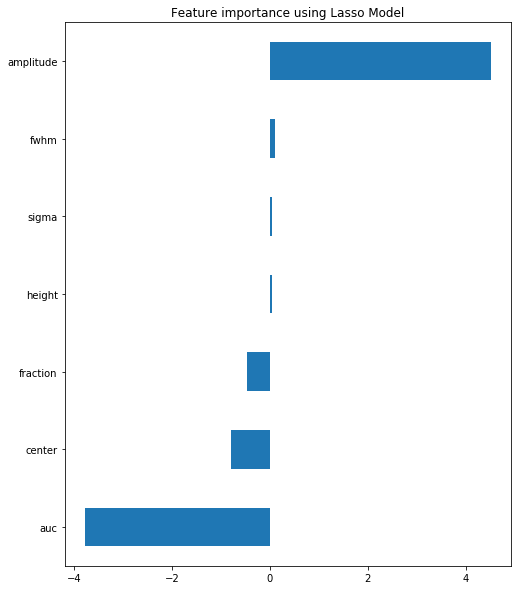

In [28]:
#LASSO 
#feature selection

# X_train_scaled  = preprocessing.normalize(X_train, norm='l2', axis=0, copy=True, return_norm=False)
# X_test_scaled  = preprocessing.normalize(X_test, norm='l2', axis=0, copy=True, return_norm=False)
# If normalized is needed
scaler = StandardScaler().fit(X_train)
X_train_normalized = pd.DataFrame(data=scaler.transform(X_train), columns=X_train.columns)
X_test_normalized = pd.DataFrame(data=scaler.transform(X_test), columns=X_test.columns)
clf = linear_model.Lasso(alpha=0.004, tol=0.0001 ,max_iter=50000)
clf.fit(X_train_normalized,y_train)
coef = pd.Series(clf.coef_, index = X_train.columns)
print(coef)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

# What makes sense is that center should be the only one to correlate to labels due to peakidentification
# L1 loss function points to center as the only solution

C:\Users\user1\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user1\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  import sys
C:\Users\user1\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to

Text(0.5, 1.0, 'error vs $\\lambda$')

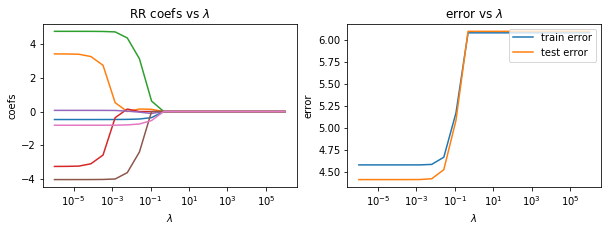

In [29]:
model=linear_model.Lasso()
# RR vs lambda (based on sklearn tutorial)
coefs = []
trainerror = []
testerror = []
scaler = StandardScaler().fit(X_train)
X_train_normalized = pd.DataFrame(data=scaler.transform(X_train), columns=X_train.columns)
X_test_normalized = pd.DataFrame(data=scaler.transform(X_test), columns=X_test.columns)

Y = 8
X = 0
# do you know what is happening here? 
lambdas = np.logspace(-6,6,20) # SEACH THE RANGE OF THE LAMBDA SPACE

# loop over lambda values (strength of regularization)
for l in lambdas:
    model.set_params(alpha=l)
    model.fit(X_train_normalized,y_train)
    trainpred = model.predict(X_train_normalized)
    testpred = model.predict(X_test_normalized)
    coefs.append(model.coef_)
    trainerror.append(mean_squared_error(y_train,trainpred))
    testerror.append(mean_squared_error(y_test,testpred))
plt.figure(figsize=(10,3))
plt.locator_params(nbins=5)
plt.subplot(121)
plt.plot(lambdas,coefs)
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('coefs')
plt.title('RR coefs vs $\lambda$')
#plt.xlim(1e-4,1e0)

plt.subplot(122)
plt.plot(lambdas,trainerror,label='train error')
plt.plot(lambdas,testerror,label='test error')
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('error')
#plt.xlim(1e-4,1e0)
#plt.ylim(0,0.5)
plt.legend(loc=1)
plt.title('error vs $\lambda$')

# Ridge Feature Selection #Didnt eliminate anything 

fraction    -0.474888
sigma        0.081038
amplitude    4.765680
fwhm         0.081038
height       0.068972
auc         -4.043576
center      -0.813463
dtype: float64
Lasso picked 7 variables and eliminated the other 0 variables


C:\Users\user1\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user1\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
C:\Users\user1\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  """


Text(0.5, 1.0, 'Feature importance using Ridge Model')

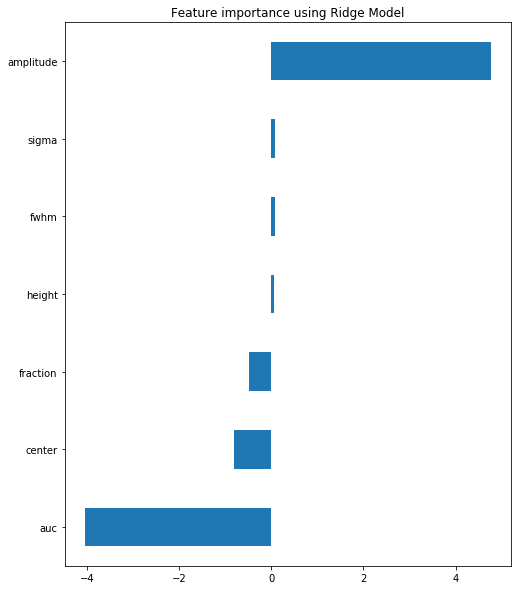

In [30]:
#Ridge
#feature selection
scaler = StandardScaler().fit(X_train)
X_train_normalized = pd.DataFrame(data=scaler.transform(X_train), columns=X_train.columns)
X_test_normalized = pd.DataFrame(data=scaler.transform(X_test), columns=X_test.columns)
clf = linear_model.Ridge(alpha=0.004, tol=0.0001 ,max_iter=50000)
clf.fit(X_train_normalized,y_train)
coef = pd.Series(clf.coef_, index = X_train.columns)
print(coef)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Ridge Model")

## 2-2 Example of searching the $\alpha$ space in RR RIDGE

Text(0.5, 1.0, 'error vs $\\lambda$')

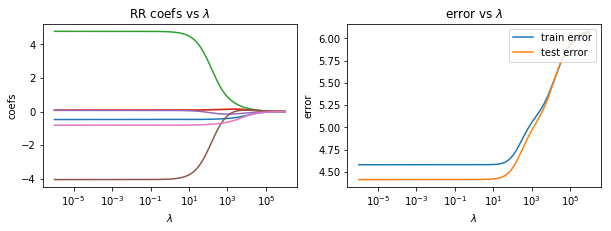

In [31]:
# RR vs lambda (based on sklearn tutorial)
coefs = []
trainerror = []
testerror = []

Y = 8
X = 0
# do you know what is happening here? 
lambdas = np.logspace(-6,6,200) # SEACH THE RANGE OF THE LAMBDA SPACE
model=Ridge()

# loop over lambda values (strength of regularization)
for l in lambdas:
    model.set_params(alpha=l)
    model.fit(X_train_normalized,y_train)
    model.fit(X_train_normalized,y_train)
    trainpred = model.predict(X_train_normalized)
    testpred = model.predict(X_test_normalized)
    coefs.append(model.coef_)
    trainerror.append(mean_squared_error(y_train,trainpred))
    testerror.append(mean_squared_error(y_test,testpred))
# what is being plotted here? 
plt.figure(figsize=(10,3))
plt.subplot(121)
plt.plot(lambdas,coefs)
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('coefs')
plt.title('RR coefs vs $\lambda$')
plt.subplot(122)
plt.plot(lambdas,trainerror,label='train error')
plt.plot(lambdas,testerror,label='test error')
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('error')
plt.legend(loc=1)
plt.title('error vs $\lambda$')

# Neural network

In [32]:
inputs=['fraction','sigma','amplitude','fwhm','height','auc','center']
amt = len(cal)
X=cal[inputs][:amt]
y = cal['labelencoded'][:amt]
X_exp=dat[inputs]
y_exp= dat['labelencoded']
np.random.seed(222)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1000)

In [33]:
import scipy.stats as stats
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statistics
import matplotlib.pyplot as plt

In [34]:
import sys
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
# Don't cheat - fit only on training data
scaler.fit(X_train)  
X_train = scaler.transform(X_train)  
# apply same transformation to test data
X_test = scaler.transform(X_test)  


C:\Users\user1\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user1\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  
C:\Users\user1\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  


Training set score: 0.296123
Test set score: 0.300765


C:\Users\user1\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user1\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  from ipykernel import kernelapp as app


(787,)
(787, 7)
Experimental Error Rate: 0.5730622617534943


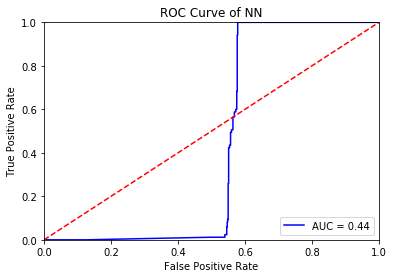

In [84]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, batch_size=10000,verbose=0, max_iter=200, validation_fraction=0.33,
                    hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(X_train, y_train)

clf.predict(X_test)

print("Training set score: %f" % clf.score(X_train, y_train))
print("Test set score: %f" % clf.score(X_test, y_test))

# instantiate the model with the best known parameters
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, batch_size=10000,verbose=0, max_iter=200, validation_fraction=0.33,
                    hidden_layer_sizes=(5, 2), random_state=1)
scaler = StandardScaler().fit(X_exp)
X_exp_normalized = pd.DataFrame(data=scaler.transform(X_exp), columns=X_exp.columns)
# train the model with X and y (not X_train and y_train)
clf.fit(X_exp_normalized, y_exp)

# make a prediction for an out-of-sample observation
# print the shapes of the new y objects
print(y_exp.shape)
print(X_exp_normalized.shape)

rate = clf.predict(X_exp_normalized) == y_exp # USE TO PREDICT NEW X DATA PUT INTO THE TRAINING MODEL
print('Experimental Error Rate:', np.mean(rate)) # COMPARING THE PREDICTED VALUES WITH ACTUAL RATE VALUES

from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
clf.fit(X_exp_normalized, y_exp)
y_scores = clf.predict_proba(X_exp_normalized)
fpr, tpr, thresholds = metrics.roc_curve(y_exp, y_scores[:, 1], pos_label=2)
metrics.auc(fpr, tpr)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of NN')
plt.show()
# Pick hyper parameters change how fast your neaural network learns
# change the conversion of the network settings and its accuracy settings 
# The epochs limit  can be changed into a conditiional function where 
# This is sayting just run  150 epochs and stop
# THe neaural network can be inputed with certain data points for each epoch
# The history object returned by the fit call contains the information in a fitting run.

Iteration 1, loss = 3.78760628
Iteration 2, loss = 1.99099056
Iteration 3, loss = 1.94392072
Iteration 4, loss = 1.92595947
Iteration 5, loss = 1.91310157
Iteration 6, loss = 1.90265144
Iteration 7, loss = 1.89390634
Iteration 8, loss = 1.88625700
Iteration 9, loss = 1.87985012
Iteration 10, loss = 1.87412329
Iteration 11, loss = 1.86929862
Iteration 12, loss = 1.86465022
Iteration 13, loss = 1.86075319
Iteration 14, loss = 1.85724511
Iteration 15, loss = 1.85402467
Iteration 16, loss = 1.85128364
Iteration 17, loss = 1.84861242
Iteration 18, loss = 1.84622145
Iteration 19, loss = 1.84396410
Iteration 20, loss = 1.84208249
Iteration 21, loss = 1.84020178
Iteration 22, loss = 1.83858977
Iteration 23, loss = 1.83732866
Iteration 24, loss = 1.83583748
Iteration 25, loss = 1.83446513
Iteration 26, loss = 1.83325895
Iteration 27, loss = 1.83231364
Iteration 28, loss = 1.83137439
Iteration 29, loss = 1.83032687
Iteration 30, loss = 1.82941256
Iteration 31, loss = 1.82867169
Iteration 32, los

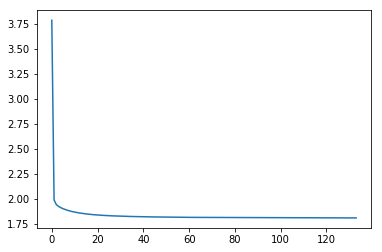

C:\Users\user1\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user1\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.


Iteration 1, loss = 2.08314535
Iteration 2, loss = 2.07205588
Iteration 3, loss = 2.05558353
Iteration 4, loss = 2.03594018
Iteration 5, loss = 2.01509991
Iteration 6, loss = 1.99358228
Iteration 7, loss = 1.97169017
Iteration 8, loss = 1.95040585
Iteration 9, loss = 1.92988686
Iteration 10, loss = 1.91008074
Iteration 11, loss = 1.89046240
Iteration 12, loss = 1.87207488
Iteration 13, loss = 1.85408923
Iteration 14, loss = 1.83701181
Iteration 15, loss = 1.82021308
Iteration 16, loss = 1.80441408
Iteration 17, loss = 1.78912343
Iteration 18, loss = 1.77433649
Iteration 19, loss = 1.75985525
Iteration 20, loss = 1.74578562
Iteration 21, loss = 1.73221445
Iteration 22, loss = 1.71920937
Iteration 23, loss = 1.70641803
Iteration 24, loss = 1.69371860
Iteration 25, loss = 1.68149083
Iteration 26, loss = 1.66963594
Iteration 27, loss = 1.65789077
Iteration 28, loss = 1.64644342
Iteration 29, loss = 1.63533180
Iteration 30, loss = 1.62435966
Iteration 31, loss = 1.61363917
Iteration 32, los

Iteration 262, loss = 0.77306773
Iteration 263, loss = 0.77185579
Iteration 264, loss = 0.77060342
Iteration 265, loss = 0.76943654
Iteration 266, loss = 0.76817785
Iteration 267, loss = 0.76709178
Iteration 268, loss = 0.76585093
Iteration 269, loss = 0.76466820
Iteration 270, loss = 0.76353111
Iteration 271, loss = 0.76231983
Iteration 272, loss = 0.76117172
Iteration 273, loss = 0.75998196
Iteration 274, loss = 0.75881309
Iteration 275, loss = 0.75771441
Iteration 276, loss = 0.75660515
Iteration 277, loss = 0.75540616
Iteration 278, loss = 0.75440915
Iteration 279, loss = 0.75323703
Iteration 280, loss = 0.75211495
Iteration 281, loss = 0.75098454
Iteration 282, loss = 0.74984338
Iteration 283, loss = 0.74879377
Iteration 284, loss = 0.74770692
Iteration 285, loss = 0.74666092
Iteration 286, loss = 0.74562484
Iteration 287, loss = 0.74447980
Iteration 288, loss = 0.74341870
Iteration 289, loss = 0.74234385
Iteration 290, loss = 0.74129948
Iteration 291, loss = 0.74026062
Iteration 

C:\Users\user1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)



Iteration 8, loss = 1.95040585
Iteration 9, loss = 1.92988686
Iteration 10, loss = 1.91008074
Iteration 11, loss = 1.89046240
Iteration 12, loss = 1.87207488
Iteration 13, loss = 1.85408923
Iteration 14, loss = 1.83701181
Iteration 15, loss = 1.82021308
Iteration 16, loss = 1.80441408
Iteration 17, loss = 1.78912343
Iteration 18, loss = 1.77433649
Iteration 19, loss = 1.75985525
Iteration 20, loss = 1.74578562
Iteration 21, loss = 1.73221445
Iteration 22, loss = 1.71920937
Iteration 23, loss = 1.70641803
Iteration 24, loss = 1.69371860
Iteration 25, loss = 1.68149083
Iteration 26, loss = 1.66963594
Iteration 27, loss = 1.65789077
Iteration 28, loss = 1.64644342
Iteration 29, loss = 1.63533180
Iteration 30, loss = 1.62435966
Iteration 31, loss = 1.61363917
Iteration 32, loss = 1.60311574
Iteration 33, loss = 1.59290494
Iteration 34, loss = 1.58276152
Iteration 35, loss = 1.57292688
Iteration 36, loss = 1.56324388
Iteration 37, loss = 1.55378431
Iteration 38, loss = 1.54452277
Iteration

Iteration 275, loss = 0.75771441
Iteration 276, loss = 0.75660515
Iteration 277, loss = 0.75540616
Iteration 278, loss = 0.75440915
Iteration 279, loss = 0.75323703
Iteration 280, loss = 0.75211495
Iteration 281, loss = 0.75098454
Iteration 282, loss = 0.74984338
Iteration 283, loss = 0.74879377
Iteration 284, loss = 0.74770692
Iteration 285, loss = 0.74666092
Iteration 286, loss = 0.74562484
Iteration 287, loss = 0.74447980
Iteration 288, loss = 0.74341870
Iteration 289, loss = 0.74234385
Iteration 290, loss = 0.74129948
Iteration 291, loss = 0.74026062
Iteration 292, loss = 0.73923146
Iteration 293, loss = 0.73824245
Iteration 294, loss = 0.73719125
Iteration 295, loss = 0.73622150
Iteration 296, loss = 0.73514666
Iteration 297, loss = 0.73411451
Iteration 298, loss = 0.73305128
Iteration 299, loss = 0.73206722
Iteration 300, loss = 0.73109905
Iteration 301, loss = 0.73008886
Iteration 302, loss = 0.72909026
Iteration 303, loss = 0.72809792
Iteration 304, loss = 0.72713793
Iteration 

C:\Users\user1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


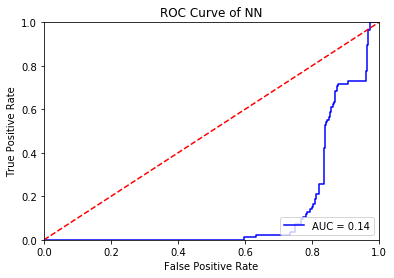

In [85]:
clf = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=400, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1)

clf.fit(X_train, y_train)

clf.predict(X_test)

print("Training set score: %f" % clf.score(X_train, y_train))
print("Test set score: %f" % clf.score(X_test, y_test))
loss_values = clf.loss_curve_
# print (loss_values)
plt.plot(loss_values)
plt.show()
# instantiate the model with the best known parameters
clf = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=400, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1)
scaler = StandardScaler().fit(X_exp)
X_exp_normalized = pd.DataFrame(data=scaler.transform(X_exp), columns=X_exp.columns)
# train the model with X and y (not X_train and y_train)
clf.fit(X_exp_normalized, y_exp)

# make a prediction for an out-of-sample observation
# print the shapes of the new y objects
print(y_exp.shape)
print(X_exp_normalized.shape)

rate = clf.predict(X_exp_normalized) == y_exp # USE TO PREDICT NEW X DATA PUT INTO THE TRAINING MODEL
print('Experimental Error Rate:', np.mean(rate)) # COMPARING THE PREDICTED VALUES WITH ACTUAL RATE VALUES

from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
clf.fit(X_exp_normalized, y_exp)
y_scores = clf.predict_proba(X_exp_normalized)
fpr, tpr, thresholds = metrics.roc_curve(y_exp, y_scores[:, 1], pos_label=2)
metrics.auc(fpr, tpr)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of NN')
plt.show()

Iteration 1, loss = 1.63689168
Iteration 2, loss = 1.30091912
Iteration 3, loss = 1.21771777
Iteration 4, loss = 1.17369260
Iteration 5, loss = 1.14753614
Iteration 6, loss = 1.13123705
Iteration 7, loss = 1.10993050
Iteration 8, loss = 1.09822086
Iteration 9, loss = 1.09634212
Iteration 10, loss = 1.08568059
Training set score: 0.486139
Test set score: 0.511045


C:\Users\user1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Text(0, 0.5, 'Loss Cost')

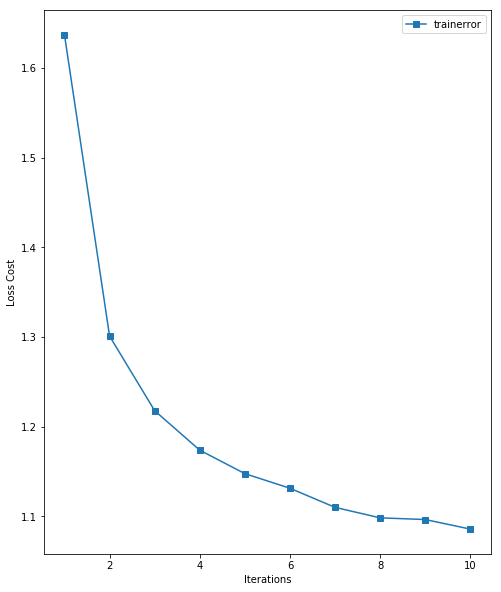

In [37]:
num = 10
clf = MLPClassifier(hidden_layer_sizes=(5,2), max_iter=num, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)

clf.fit(X_train, y_train)

ypred = clf.predict(X_test)

print("Training set score: %f" % clf.score(X_train, y_train))
print("Test set score: %f" % clf.score(X_test, y_test))
loss_values = clf.loss_curve_
# print (loss_values)
# plt.plot(loss_values)
# plt.show()
lossrange = np.arange(1,num+1,1)
plt.plot(lossrange,loss_values,marker="s",label='trainerror')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Loss Cost')



C:\Users\user1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarni

Training set score: 0.605311
Test set score: 0.611725


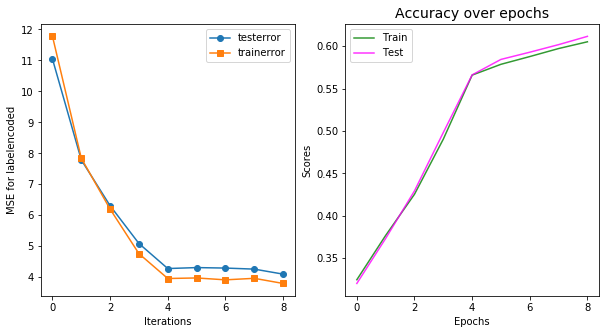

In [38]:
coefs = []
trainerror = []
testerror = []
loss_values = []
scores_train = []
scores_test = []
num = 10
lossrange = np.arange(1,num,1)
for i in lossrange:
    clf = MLPClassifier(solver='sgd',hidden_layer_sizes=(100,100), random_state=1, max_iter=i, warm_start=True)
    clf.fit(X_train,y_train)
    trainpred = clf.predict(X_train)
    testpred = clf.predict(X_test)
    coefs.append(clf.coefs_)
    trainerror.append(mean_squared_error(y_train,trainpred))
    testerror.append(mean_squared_error(y_test,testpred))
    loss_values.append(clf.loss_curve_)
    # SCORE TRAIN
    scores_train.append(clf.score(X_train, y_train))

    # SCORE TEST
    scores_test.append(clf.score(X_test, y_test))
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(trainerror,marker='o',label='testerror')
plt.plot(testerror,marker="s",label='trainerror')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('MSE for labelencoded')
plt.subplot(122)
print("Training set score: %f" % clf.score(X_train, y_train))
print("Test set score: %f" % clf.score(X_test, y_test))
plt.plot(scores_train, color='green', alpha=0.8, label='Train')
plt.plot(scores_test, color='magenta', alpha=0.8, label='Test')
plt.title("Accuracy over epochs", fontsize=14)
plt.xlabel('Epochs')
plt.ylabel('Scores')
plt.legend(loc='upper left')
plt.show()

### Accuracy over epochs data

C:\Users\user1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarni

C:\Users\user1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (34) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (35) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (36) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (37) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceW

C:\Users\user1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (67) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (68) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (69) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (70) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceW

Training set score: 0.975890
Test set score: 0.969839


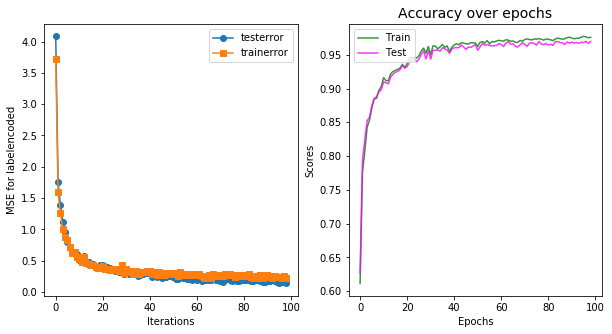

In [39]:
coefs = []
trainerror = []
testerror = []
loss_values = []
scores_train = []
scores_test = []
num = 100
lossrange = np.arange(1,num,1)
for i in lossrange:
    clf = MLPClassifier(hidden_layer_sizes=(100,100), random_state=1, max_iter=i, warm_start=True)
    clf.fit(X_train, y_train)
    trainpred = clf.predict(X_train)
    testpred = clf.predict(X_test)
    coefs.append(clf.coefs_)
    trainerror.append(mean_squared_error(y_train,trainpred))
    testerror.append(mean_squared_error(y_test,testpred))
    loss_values.append(clf.loss_curve_)
    # SCORE TRAIN
    scores_train.append(clf.score(X_train, y_train))

    # SCORE TEST
    scores_test.append(clf.score(X_test, y_test))
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(trainerror,marker='o',label='testerror')
plt.plot(testerror,marker="s",label='trainerror')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('MSE for labelencoded')
plt.subplot(122)
print("Training set score: %f" % clf.score(X_train, y_train))
print("Test set score: %f" % clf.score(X_test, y_test))
plt.plot(scores_train, color='green', alpha=0.8, label='Train')
plt.plot(scores_test, color='magenta', alpha=0.8, label='Test')
plt.title("Accuracy over epochs", fontsize=14)
plt.xlabel('Epochs')
plt.ylabel('Scores')
plt.legend(loc='upper left')
plt.show()

# Cross Validation of NN

In [40]:
# Cross Validation
inputs=['fraction','sigma','amplitude','fwhm','height','auc','center']
amt = len(cal)
X=cal[inputs][:amt]
y = cal['labelencoded'][:amt]
X_exp=dat[inputs]
y_exp= dat['labelencoded']
np.random.seed(222)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1000)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1000)
# ntrain = train.shape[0]
# nval = val.shape[0]
# train = np.concatenate((train, val))

# test_fold = -1*np.ones(ntrain+nval)
# test_fold[ntrain:] = 0
# cv = PredefinedSplit(test_fold)

# # you can pass the object cv to functions such as GridSearchCV


# Kfold
from sklearn.model_selection import KFold
import numpy as np
kf = KFold(n_splits=5)
X = np.array(X)
y = np.array(y)
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print('X_test: ', X_test)

X_test:  [[0.7183274673384545 4.380337829195924 3.2415220140280736 ...
  0.2671145389093179 3.209203120986047 355.0]
 [0.5594965905780308 4.4658648590683425 8.22711448927372 ...
  0.7092664460016654 8.205188796289036 587.0]
 [0.9999913699057317 4.095155587787694 1.748731821328024 ...
  0.13592668217331078 1.7437559985227122 815.0]
 ...
 [0.028378647147297764 7.032684550062573 3.0153297926523157 ...
  0.19955401127171063 3.0148694666544533 750.0]
 [0.5341708707401888 4.095375577815884 0.980547686522518 ...
  0.09309931150636769 0.9790572355626709 815.0]
 [0.5040164888442815 8.414392057556011 13.59196921278916 ...
  0.6354783550375178 13.554181128100657 860.0]]
X_test:  [[0.32740991740649905 3.2444608998061657 4.462605667718377 ...
  0.5778912386300099 4.459527929338729 868.0]
 [0.2582738948097629 17.79495467447035 4.716255529092774 ...
  0.11412697207586692 4.703115195283641 929.0]
 [2.486351112218621e-07 3.603342931635889 2.026284510845859 ...
  0.2641390356530632 2.026284509811624 993

In [41]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
seed = 21899

In [42]:
# from sklearn.neural_network import MLPClassifier
# clf = MLPClassifier(max_iter=1)
# #Define a hyper-parameter space to search. (All the values that you want to try out.)

# parameter_space = {
#     'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
#     'activation': ['tanh', 'relu'],
#     'solver': ['sgd', 'adam'],
#     'alpha': [0.0001, 0.05],
#     'learning_rate': ['constant','adaptive'],
# }
# # Note: the max_iter=100 that you defined on the initializer is not in the grid. So, that number will be constant, while the ones in the grid will be searched.

# # Run the search:

# from sklearn.model_selection import GridSearchCV

# clf = GridSearchCV(clf, parameter_space, n_jobs=-1, cv=3)
# clf.fit(X_train, y_train)
# # Note: the parameter n_jobs is to define how many CPU cores from your computer to use. The cv is the number of splits for cross-validation.

# # See the best results:

# # Best paramete set
# print('Best parameters found:\n', clf.best_params_)

# # All results
# means = clf.cv_results_['mean_test_score']
# stds = clf.cv_results_['std_test_score']
# for mean, std, params in zip(means, stds, clf.cv_results_['params']):
#     print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
# # Now you can use the clf to make new predictions. For example, check the performance on your test set.

# y_true, y_pred = y_test , clf.predict(X_test)

# from sklearn.metrics import classification_report
# print('Results on the test set:')
# print(classification_report(y_true, y_pred))










In [43]:
[coef.shape for coef in clf.coefs_]

[(7, 100), (100, 100), (100, 8)]

C:\Users\user1\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user1\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user1\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: DataConversionWarning: Data with input dtype object were all converted to float64 by 

Iteration 1, loss = 1.97279976
Iteration 2, loss = 1.89153290
Iteration 3, loss = 1.79349003
Iteration 4, loss = 1.73985917
Iteration 5, loss = 1.68017268
Iteration 6, loss = 1.62904825
Iteration 7, loss = 1.59314559
Iteration 8, loss = 1.56643567
Iteration 9, loss = 1.54477495
Iteration 10, loss = 1.51973661
(787,)
(787, 7)
Experimental Error Rate: 0.37738246505717915
Training set score: 0.186298
Test set score: 0.187766
Iteration 1, loss = 1.97279976
Iteration 2, loss = 1.89153290
Iteration 3, loss = 1.79349003
Iteration 4, loss = 1.73985917
Iteration 5, loss = 1.68017268
Iteration 6, loss = 1.62904825
Iteration 7, loss = 1.59314559
Iteration 8, loss = 1.56643567
Iteration 9, loss = 1.54477495
Iteration 10, loss = 1.51973661
(787,)
(787, 7)
Experimental Error Rate: 0.37738246505717915
Iteration 1, loss = 1.97279976
Iteration 2, loss = 1.89153290
Iteration 3, loss = 1.79349003
Iteration 4, loss = 1.73985917
Iteration 5, loss = 1.68017268
Iteration 6, loss = 1.62904825
Iteration 7, los

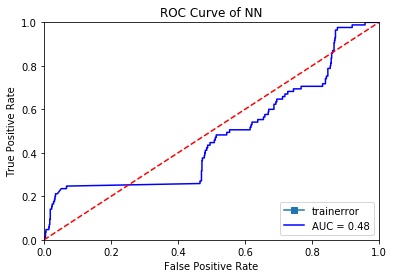

In [86]:
num = 10
# instantiate the model with the best known parameters
clf = MLPClassifier(hidden_layer_sizes=(5,2), max_iter=num, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)
# Scale and Normalize
scaler = StandardScaler().fit(X_exp)
X_exp_normalized = pd.DataFrame(data=scaler.transform(X_exp), columns=X_exp.columns)
# train the model with X and y (not X_train and y_train)
clf.fit(X_exp_normalized, y_exp)
# print the shapes of the new y objects
print(y_exp.shape)
print(X_exp_normalized.shape)

# make a prediction for an out-of-sample observation
ypred = clf.predict(X_exp_normalized) 
rate = clf.predict(X_exp_normalized)  == y_exp # USE TO PREDICT NEW X DATA PUT INTO THE TRAINING MODEL
print('Experimental Error Rate:', np.mean(rate)) # COMPARING THE PREDICTED VALUES WITH ACTUAL RATE VALUES
print("Training set score: %f" % clf.score(X_train, y_train))
print("Test set score: %f" % clf.score(X_test, y_test))
loss_values = clf.loss_curve_
# print (loss_values)
# plt.plot(loss_values)
# plt.show()
lossrange = np.arange(1,num+1,1)
plt.plot(lossrange,loss_values,marker="s",label='trainerror')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Loss Cost')
# instantiate the model with the best known parameters
clf = MLPClassifier(hidden_layer_sizes=(5,2), max_iter=num, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)
scaler = StandardScaler().fit(X_exp)
X_exp_normalized = pd.DataFrame(data=scaler.transform(X_exp), columns=X_exp.columns)
# train the model with X and y (not X_train and y_train)
clf.fit(X_exp_normalized, y_exp)

# make a prediction for an out-of-sample observation
# print the shapes of the new y objects
print(y_exp.shape)
print(X_exp_normalized.shape)

rate = clf.predict(X_exp_normalized) == y_exp # USE TO PREDICT NEW X DATA PUT INTO THE TRAINING MODEL
print('Experimental Error Rate:', np.mean(rate)) # COMPARING THE PREDICTED VALUES WITH ACTUAL RATE VALUES

from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
clf.fit(X_exp_normalized, y_exp)
y_scores = clf.predict_proba(X_exp_normalized)
fpr, tpr, thresholds = metrics.roc_curve(y_exp, y_scores[:, 1], pos_label=2)
metrics.auc(fpr, tpr)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of NN')
plt.show()






# Support Vector Machines rbf

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

from matplotlib.colors import ListedColormap

In [46]:
inputs=['fraction','sigma','amplitude','fwhm','height','auc','center']
amt = len(cal)
X=cal[inputs][:amt]
y = cal['labelencoded'][:amt]
X_exp=dat[inputs]
y_exp= dat['labelencoded']
np.random.seed(222)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1000)

In [47]:
X_train_scaled  = preprocessing.normalize(X_train, norm='l2', axis=0, copy=True, return_norm=False)
X_test_scaled  = preprocessing.normalize(X_test, norm='l2', axis=0, copy=True, return_norm=False)
#Support Vector Machine 
#-->Chosen under the assumption that eventually more batteries will be added with highly dimensional features that 
# can not be seperated by simple linear or logistic regression models 

In [48]:
from sklearn.svm import SVC  
svclassifier = SVC(kernel='sigmoid',gamma ='scale')
svclassifier.fit(X_train, y_train) 
trainpred=svclassifier.predict(X_train_scaled ) #predict train data 
testpred=svclassifier.predict(X_test_scaled )
print("Train error",mean_squared_error(y_train,trainpred))
print("Test error",mean_squared_error(y_test,testpred))
print("Training set score: %f" % svclassifier.score(X_train, y_train))
print("Test set score: %f" % svclassifier.score(X_test, y_test))
y_pred = svclassifier.predict(X_test)  
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn import metrics
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Train error 16.228040361125863
Test error 16.277400169923535
Training set score: 0.397876
Test set score: 0.392948
[[195 112 126   0   9   0   0]
 [ 62 419   1   0 197   0  29]
 [  0 200   0   0   0   0   0]
 [  0   0   0   0 104   0   0]
 [  0 181   0   0 101 106   0]
 [  0 104   0   0  17 210   0]
 [  0   0  74   0 107   0   0]]
              precision    recall  f1-score   support

           0       0.76      0.44      0.56       442
           1       0.41      0.59      0.49       708
           2       0.00      0.00      0.00       200
           3       0.00      0.00      0.00       104
           5       0.19      0.26      0.22       388
           6       0.66      0.63      0.65       331
           7       0.00      0.00      0.00       181

   micro avg       0.39      0.39      0.39      2354
   macro avg       0.29      0.28      0.27      2354
weighted avg       0.39      0.39      0.38      2354

Accuracy: 0.3929481733220051


C:\Users\user1\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [49]:
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
svclassifier = SVC(kernel='rbf',gamma ='scale')
scaler = StandardScaler().fit(X_exp)
X_exp_scaled  = preprocessing.normalize(X_exp, norm='l2', axis=0, copy=True, return_norm=False)
svclassifier.fit(X_exp_scaled,y_exp)
y_scores = svclassifier.predict_proba(X_exp_scaled)
fpr, tpr, thresholds = metrics.roc_curve(y_exp, y_scores[:, 1], pos_label=2)
metrics.auc(fpr, tpr)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

C:\Users\user1\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


AttributeError: predict_proba is not available when  probability=False

# KNN

In [50]:
inputs=['fraction','sigma','amplitude','fwhm','height','auc','center']
amt = len(cal)
X=cal[inputs][:amt]
y = cal['labelencoded'][:amt]
X_exp=dat[inputs]
y_exp= dat['labelencoded']
np.random.seed(222)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1000)

In [51]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
%matplotlib inline
# this is a new library you haven't seen before, what do you think it does? 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [52]:
KNNmodel = KNeighborsClassifier(n_neighbors=3) # initialize the model by choosing the number of neighbors (flexibility of model in this case)
# KNNmodel = KNeighborsClassifier(n_neighbors=1) minimum neighbord minimum predicted error
# remember the parabolic function of training vs. test set there is limit to the flexilibility vs. errors of the model
# Expected n_neighbors <= n_samples,  but n_samples = 15, n_neighbors = 20
# thus KNNmodel = KNeighborsClassifier(n_neighbors=15) is max

In [53]:
KNNmodel.fit(X_train, y_train) # feed the model some training data

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [54]:
rate = KNNmodel.predict(X_train) == y_train # USE TO PREDICT NEW X DATA PUT INTO THE TRAINING MODEL
print('Training Error Rate:', np.mean(rate)) # COMPARING THE PREDICTED VALUES WITH ACTUAL RATE VALUES

rate = KNNmodel.predict(X_test) == y_test
print('Testing Error Rate:', np.mean(rate))

Training Error Rate: 0.9992565055762082
Testing Error Rate: 0.9957519116397621


In [55]:
k_range = range(1,20)
# empty list to store scores
k_scores = []
trainerror = []
testerror = []
train_rmse_val = []
test_rmse_val = []
# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    KNNmodel = KNeighborsClassifier(n_neighbors=k)
    KNNmodel.fit(X_train, y_train)
    trainerror.append(mean_squared_error(y_train,KNNmodel.predict(X_train)))
    testerror.append(mean_squared_error(y_test,KNNmodel.predict(X_test)))
    train_rmse_val.append(np.sqrt(mean_squared_error(y_train,KNNmodel.predict(X_train)))) #store rmse values
#     print('Train RMSE value for k= ' , k , 'is:', trainerror)
    test_rmse_val.append(np.sqrt(mean_squared_error(y_train,KNNmodel.predict(X_train)))) #store rmse values
#     print('Test RMSE value for k= ' , k , 'is:', testerror)
from sklearn.model_selection import GridSearchCV
from sklearn import neighbors
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)
model.best_params_

{'n_neighbors': 2}

Text(0, 0.5, 'MSE for $labelencoded$')

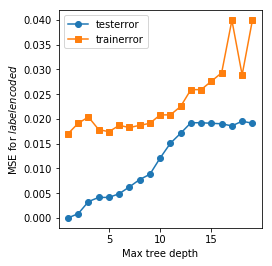

In [56]:
%matplotlib inline
plt.figure(figsize=(8,4))
plt.subplot(121)
plt.plot(k_range,trainerror,marker='o',label='testerror')
plt.plot(k_range,testerror,marker="s",label='trainerror')
plt.legend()
plt.xlabel('Max tree depth')
plt.ylabel('MSE for $labelencoded$')

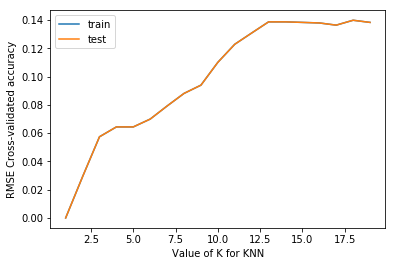

In [57]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, train_rmse_val,label='train')
plt.plot(k_range, test_rmse_val,label='test')
plt.xlabel('Value of K for KNN')
plt.ylabel('RMSE Cross-validated accuracy')
plt.legend()

In [58]:
# instantiate the model with the best known parameters
KNNmodel = KNeighborsClassifier(n_neighbors=2)
scaler = StandardScaler().fit(X_exp)
X_exp_normalized = pd.DataFrame(data=scaler.transform(X_exp), columns=X_exp.columns)
# train the model with X and y (not X_train and y_train)
KNNmodel.fit(X_exp_normalized, y_exp)

# make a prediction for an out-of-sample observation
# print the shapes of the new y objects
print(y_exp.shape)
print(X_exp_normalized.shape)

rate = KNNmodel.predict(X_exp_normalized) == y_exp # USE TO PREDICT NEW X DATA PUT INTO THE TRAINING MODEL
print('Experimental Error Rate:', np.mean(rate)) # COMPARING THE PREDICTED VALUES WITH ACTUAL RATE VALUES

(787,)
(787, 7)
Experimental Error Rate: 0.9847522236340533


C:\Users\user1\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user1\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [59]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn import svm
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn import svm

In [60]:
# inputs=['fraction','sigma','amplitude','height','center']
# X_train = cal[inputs]
# y_train = cal['labelencoded']
# X_test = dat[inputs]
# y_test = dat['labelencoded']

# KNN CROSS VALIDATION FROM https://www.ritchieng.com/machine-learning-cross-validation/ and lectures 

In [61]:
inputs=['fraction','sigma','amplitude','fwhm','height','auc','center']
amt = len(cal)
X=cal[inputs][:amt]
y = cal['labelencoded'][:amt]
X_exp=dat[inputs]
y_exp= dat['labelencoded']
np.random.seed(222)

# 60 -20 -20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1000)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1000)
# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
# k = 5 for KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

# Use cross_val_score function
# We are passing the entirety of X and y, not X_train or y_train, it takes care of splitting the dat
# cv=10 for 10 folds
# scoring='accuracy' for evaluation metric - althought they are many
scores = cross_val_score(knn, X_val, y_val, cv=10, scoring='accuracy')
print(scores)

[1.         0.99159664 0.98734177 0.99576271 0.99148936 0.99145299
 1.         0.98290598 0.98712446 0.99570815]


In [62]:
# use average accuracy as an estimate of out-of-sample accuracy
# numpy array has a method mean()
print(scores.mean())

0.9923382076758621


In [63]:
# search for an optimal value of K for KNN

# range of k we want to try
k_range = range(1, 50)
# empty list to store scores
k_scores = []

# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, X_val, y_val, cv=10, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())


print(k_scores)
from sklearn.model_selection import GridSearchCV
from sklearn import neighbors
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)
model.best_params_

[0.9974503078075582, 0.9965973944446427, 0.9948933409733586, 0.9936130309463762, 0.9923382076758621, 0.9910632931025207, 0.9893683776564846, 0.990637837079332, 0.9897831206150819, 0.9876644004637818, 0.9880791127952117, 0.9834087750266365, 0.984683643948564, 0.9829903354989267, 0.9817189679775591, 0.9812897834282029, 0.9812897834282029, 0.9808605988788466, 0.9800327212813101, 0.9800327212813101, 0.9779120011433596, 0.977486469228466, 0.9770572846791097, 0.9779031358951327, 0.9774739513457765, 0.9774739513457765, 0.9766299342517593, 0.9770466009184261, 0.9770466009184261, 0.9770466009184261, 0.9774757854677822, 0.9770591188011156, 0.9770591188011156, 0.9770591188011156, 0.9766371778728455, 0.9766371778728455, 0.9766371778728455, 0.9745004257360934, 0.9736493464951836, 0.9745004257360934, 0.9736457248813926, 0.9689911320549367, 0.9685674032413774, 0.9647356433769548, 0.9634697753276074, 0.9626168929853633, 0.962193164171804, 0.9613402818295599, 0.9596399112330298]


{'n_neighbors': 2}

In [64]:
# in essence, this is basically running the k-fold cross-validation method 30 times because we want to run through K values from 1 to 30
# we should have 30 scores here
print('Length of list', len(k_scores))
print('Max of list', max(k_scores))

Length of list 49
Max of list 0.9974503078075582


Text(0, 0.5, 'Cross-validated accuracy')

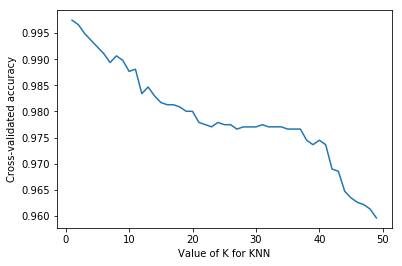

In [65]:
# plot how accuracy changes as we vary k
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
# plt.plot(x_axis, y_axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')

In [66]:
# 10-fold cross-validation with the best KNN model
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
# Instead of saving 10 scores in object named score and calculating mean
# We're just calculating the mean directly on the results
print(cross_val_score(knn, X_val, y_val, cv=10, scoring='accuracy').mean())

0.9965973944446427


C:\Users\user1\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user1\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  


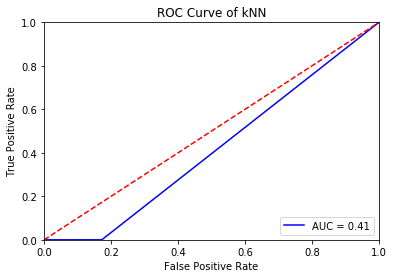

In [67]:
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
knn = KNeighborsClassifier(n_neighbors=2)
scaler = StandardScaler().fit(X_exp)
X_exp_normalized = pd.DataFrame(data=scaler.transform(X_exp), columns=X_exp.columns)
knn.fit(X_exp_normalized,y_exp)
y_scores = knn.predict_proba(X_exp_normalized)
fpr, tpr, thresholds = metrics.roc_curve(y_exp, y_scores[:, 1], pos_label=2)
metrics.auc(fpr, tpr)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

# Decision Trees # specifically to see if below descriptors can find and predict Area under curve # Strings needed to be 

In [68]:
inputs=['fraction','sigma','amplitude','fwhm','height','auc','center']
amt = len(cal)
X=cal[inputs][:amt]
y = cal['labelencoded'][:amt]
X_exp=dat[inputs]
y_exp= dat['labelencoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1000)

In [69]:
from sklearn import linear_model
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [70]:
DT=tree.DecisionTreeClassifier(max_depth=3)
DT.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [71]:
import os
#conda install -c conda-forge pydotplus=2.0.2
# http://www.webgraphviz.com
import pydotplus 

In [72]:
with open("basic_tree.dot", 'w') as f:
    f = tree.export_graphviz(DT, out_file=f)

In [73]:
#http://www.webgraphviz.com
# os.unlink('basic_tree.dot')

dot_data = tree.export_graphviz(DT, out_file=None,feature_names=inputs)
graph = pydotplus.graph_from_dot_data(dot_data) 
#graph.write_pdf("basic_tree.pdf") 

In [74]:
os.environ["PATH"] += os.pathsep + 'C:/Users/koolk/Anaconda3/Library/bin/graphviz/'

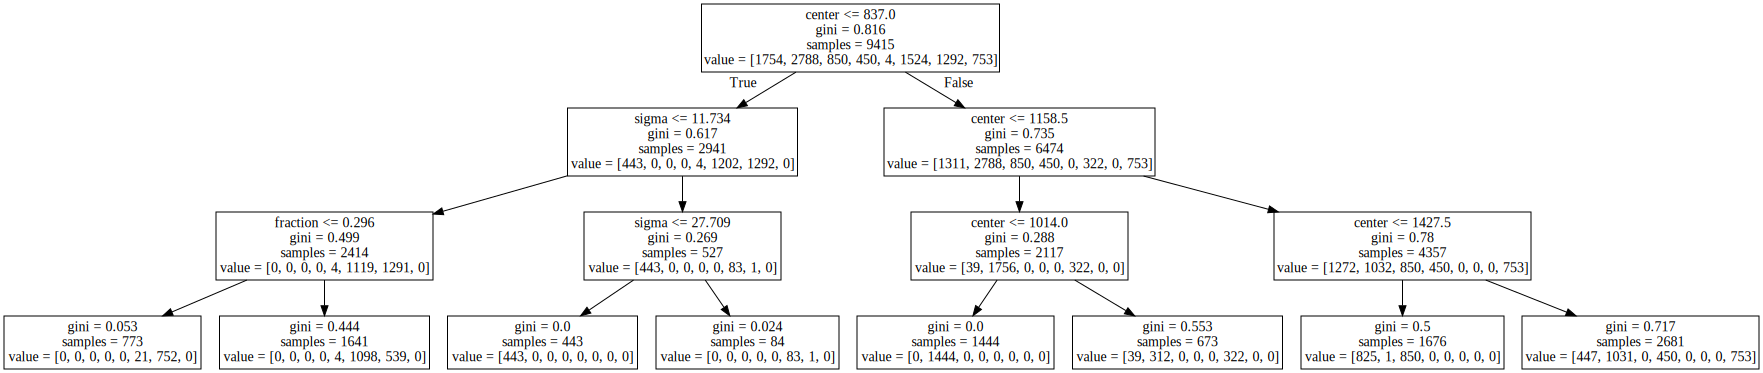

In [75]:
from IPython.display import SVG, display
display(SVG(graph.create_svg()))

In [76]:
model.fit(X_train,y_train)
rate = DT.predict(X_train) == y_train # USE TO PREDICT NEW X DATA PUT INTO THE TRAINING MODEL
print('Training Error Rate:', np.mean(rate)) # COMPARING THE PREDICTED VALUES WITH ACTUAL RATE VALUES

rate = DT.predict(X_test) == y_test
print('Testing Error Rate:', np.mean(rate))

Training Error Rate: 0.6397238449283059
Testing Error Rate: 0.6393372982158029


6
Train error 4.162294211364843
Test error 4.048428207306712


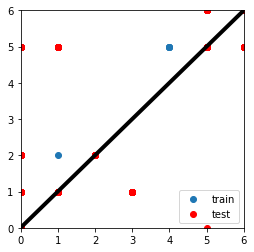

In [77]:
# make predictions on test and train set 
trainpred=DT.predict(X_train)
testpred=DT.predict(X_test)


maxlimit =testpred.max()
print(maxlimit)
#parity plot 
plt.figure(figsize=(4,4))
plt.xlim([0,maxlimit]);
plt.ylim([0,maxlimit]);
plt.scatter(y_train,trainpred, label ='train')
plt.scatter(y_test,testpred,color='r', label = 'test')
plt.plot([0,maxlimit],[0,maxlimit],lw=4,color='black')
plt.legend()
#calculate the test and train error
print("Train error",mean_squared_error(y_train,trainpred))
print("Test error",mean_squared_error(y_test,testpred))

In [78]:
trainerror = []
testerror = []

trees = np.arange(1,20,1)
#model=tree.DecisionTreeRegressor()

# loop over lambda values (strength of regularization)
for t in trees:
    model=tree.DecisionTreeClassifier(max_depth=t)
    model.fit(X_train,y_train)
    trainerror.append(mean_squared_error(y_train,model.predict(X_train)))
    testerror.append(mean_squared_error(y_test,model.predict(X_test)))

Text(0, 0.5, 'MSE for $labelencoded$')

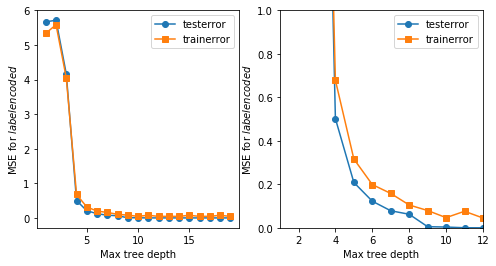

In [79]:
plt.figure(figsize=(8,4))
plt.subplot(121)
plt.plot(trees,trainerror,marker='o',label='testerror')
plt.plot(trees,testerror,marker="s",label='trainerror')
plt.legend()
plt.xlabel('Max tree depth')
plt.ylabel('MSE for $labelencoded$')
plt.subplot(122)
plt.plot(trees,trainerror,marker='o',label='testerror')
plt.plot(trees,testerror,marker="s",label='trainerror')
plt.ylim((0,1))
plt.xlim((1,12))
plt.legend()
plt.xlabel('Max tree depth')
plt.ylabel('MSE for $labelencoded$')

In [80]:
from sklearn.model_selection import GridSearchCV
from sklearn import neighbors
params = {'max_depth':[2,3,4,5,6,7,8,9]}

DTC = tree.DecisionTreeClassifier()

model = GridSearchCV(DTC, params, cv=4)
model.fit(X_train,y_train)
model.best_params_

{'max_depth': 9}

(787,)
(787, 7)
Experimental Error Rate: 0.9961880559085133


C:\Users\user1\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user1\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


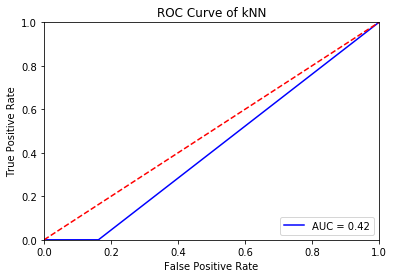

In [81]:
# instantiate the model with the best known parameters
DT=tree.DecisionTreeClassifier(max_depth=9)
scaler = StandardScaler().fit(X_exp)
X_exp_normalized = pd.DataFrame(data=scaler.transform(X_exp), columns=X_exp.columns)
# train the model with X and y (not X_train and y_train)
DT.fit(X_exp_normalized, y_exp)

# make a prediction for an out-of-sample observation
# print the shapes of the new y objects
print(y_exp.shape)
print(X_exp_normalized.shape)

rate = DT.predict(X_exp_normalized) == y_exp # USE TO PREDICT NEW X DATA PUT INTO THE TRAINING MODEL
print('Experimental Error Rate:', np.mean(rate)) # COMPARING THE PREDICTED VALUES WITH ACTUAL RATE VALUES

from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
DT=tree.DecisionTreeClassifier(max_depth=9)
DT.fit(X_exp_normalized, y_exp)
y_scores = DT.predict_proba(X_exp_normalized)
fpr, tpr, thresholds = metrics.roc_curve(y_exp, y_scores[:, 1], pos_label=2)
metrics.auc(fpr, tpr)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of DT')
plt.show()